In [122]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
import pandas as pd
df=pd.read_excel('data.xlsx', sheet_name="MAIN DATA")
df.head(5)

,survey_status,birthday,gender,marital_status,work_status,family_size,war_impact,beneficiary_income,family_income,foreign_income,disability_degree,debt_status,debt_2others,debt_2bank,debt_forrepairhome,assistance_status,assistance_source,vulnerable_needs,food_needs,agriculture_needs,construction_needs,medical_needs,other2_needs,monthly_income,covid_damage_status,covid_impact,depression,stress,none
0,Bəli,1965-02-22,Kişi,Evli,İşləmirəm,3.0,Şiddətli təsir etdi,Tam işdən gələn gəlir,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,Başqasından alınmış borc,NaN,NaN,Xeyr,Almayıb,NaN,NaN,NaN,NaN,Aid olanları seçin,Nağd yardımı,0 AZN,Bəli,Şiddətli təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN
1,Bəli,1970-11-20,Kişi,Evli,İşləmirəm,4.0,Şiddətli təsir etdi,NaN,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,NaN,NaN,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,NaN,0 AZN,Xeyr,Kifayət qədər təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN
2,Bəli,1982-02-28,Kişi,Evli,İşləyirəm,5.0,Az təsir etdi,Tam işdən gələn gəlir,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Xeyr,NaN,NaN,Ödənməmiş bank krediti,NaN,Bəli,İşlədiyi hərbi hissədən,NaN,NaN,NaN,Aid olanları seçin,NaN,NaN,700 AZN,Xeyr,Az təsir etdi,NaN,NaN,Aid olanları seçin:
3,Bəli,1962-10-02,Kişi,Evli,İşləmirəm,8.0,Şiddətli təsir etdi,NaN,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,NaN,Ödənməmiş bank krediti,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,"Ev lazımdır, evləri pis gündədir",0 AZN,Xeyr,Şiddətli təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN
4,Bəli,1976-10-07,Kişi,Evli,İşləmirəm,4.0,Şiddətli təsir etdi,NaN,NaN,NaN,Bəli,Xeyr,NaN,NaN,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,NaN,0 AZN,Xeyr,Kifayət qədər təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN


### Survey Status

In [170]:
df["survey_status"]=df["survey_status"].replace('Bəli','Yes')
df["survey_status"]=df["survey_status"].replace('Xeyr','No')
df["survey_status"].isnull().sum()

0

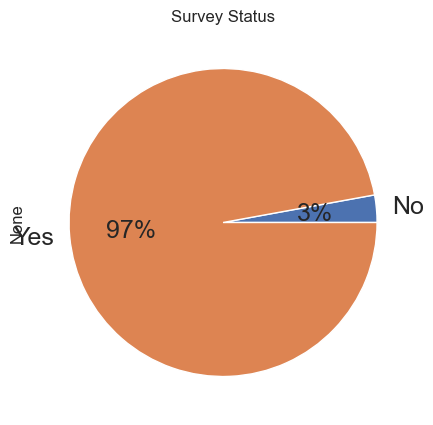

In [171]:
df.groupby("survey_status").size().plot(kind="pie",autopct="%1.0f%%",title="Survey Status",fontsize=18)
plt.show();

### Age Distribution

In [172]:
df["date_pure"]=pd.to_datetime(df["birthday"])

In [173]:
from datetime import timedelta,date
import datetime

def validation(date):
    today=datetime.date.today()
    if date>today:
        return date-timedelta(days=365.25*100)
    else:
        return date

In [174]:
def age(born):
    today=datetime.date.today()
    return today.year-born.year-((today.month,today.day)<(born.month,born.day))

In [175]:
df["date_pure"]=pd.to_datetime(df["birthday"])
df["date_pure"]=df["date_pure"].apply(lambda x:validation(x))
df["age"]=df["date_pure"].apply(lambda x:age(x))
df.head(5)

,survey_status,birthday,gender,marital_status,work_status,family_size,war_impact,beneficiary_income,family_income,foreign_income,disability_degree,debt_status,debt_2others,debt_2bank,debt_forrepairhome,assistance_status,assistance_source,vulnerable_needs,food_needs,agriculture_needs,construction_needs,medical_needs,other2_needs,monthly_income,covid_damage_status,covid_impact,depression,stress,none,date_pure,age
0,Yes,1965-02-22,Kişi,Evli,İşləmirəm,3.0,Şiddətli təsir etdi,Tam işdən gələn gəlir,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,Başqasından alınmış borc,NaN,NaN,Xeyr,Almayıb,NaN,NaN,NaN,NaN,Aid olanları seçin,Nağd yardımı,0 AZN,Bəli,Şiddətli təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN,1965-02-22,57.0
1,Yes,1970-11-20,Kişi,Evli,İşləmirəm,4.0,Şiddətli təsir etdi,NaN,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,NaN,NaN,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,NaN,0 AZN,Xeyr,Kifayət qədər təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN,1970-11-20,51.0
2,Yes,1982-02-28,Kişi,Evli,İşləyirəm,5.0,Az təsir etdi,Tam işdən gələn gəlir,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Xeyr,NaN,NaN,Ödənməmiş bank krediti,NaN,Bəli,İşlədiyi hərbi hissədən,NaN,NaN,NaN,Aid olanları seçin,NaN,NaN,700 AZN,Xeyr,Az təsir etdi,NaN,NaN,Aid olanları seçin:,1982-02-28,40.0
3,Yes,1962-10-02,Kişi,Evli,İşləmirəm,8.0,Şiddətli təsir etdi,NaN,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,NaN,Ödənməmiş bank krediti,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,"Ev lazımdır, evləri pis gündədir",0 AZN,Xeyr,Şiddətli təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN,1962-10-02,59.0
4,Yes,1976-10-07,Kişi,Evli,İşləmirəm,4.0,Şiddətli təsir etdi,NaN,NaN,NaN,Bəli,Xeyr,NaN,NaN,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,NaN,0 AZN,Xeyr,Kifayət qədər təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN,1976-10-07,45.0


In [176]:
df.loc[(df.survey_status=="Yes")&(df.birthday.isnull()),"age"]=47

In [177]:
df["age_bin"]=pd.cut(df["age"],bins=[17,35,50,65,np.inf])

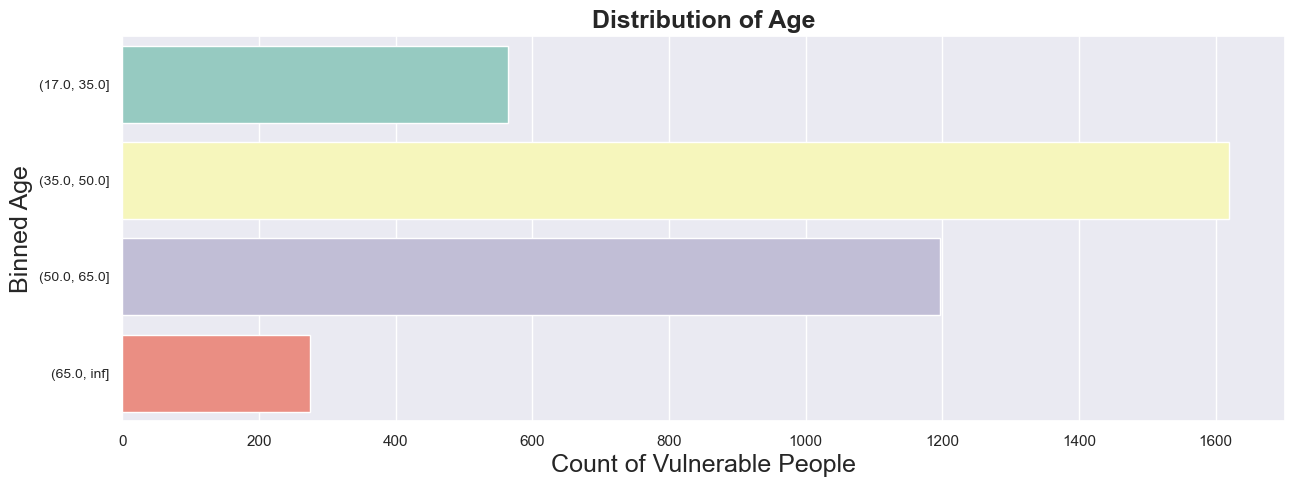

In [178]:
ax=sns.countplot(y="age_bin",data=df,palette="Set3");
ax.set_title("Distribution of Age", fontsize=18,fontweight="bold")
ax.set_xlabel("Count of Vulnerable People", fontsize=18)
ax.set_ylabel("Binned Age", fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0,ha="right",fontsize=10)
plt.show();

In [179]:
df["age"].describe()

count    3656.00000
mean       48.33698
std        12.05583
min        19.00000
25%        40.00000
50%        47.00000
75%        56.00000
max        98.00000
Name: age, dtype: float64

### Age Distribution according to the Gender

In [180]:
a=pd.pivot_table(df,index=["age_bin"],columns=["gender"],values=["age"],aggfunc="count")
a

age      
gender        Kişi Qadın
age_bin                 
(17.0, 35.0]   461   103
(35.0, 50.0]  1288   332
(50.0, 65.0]   959   238
(65.0, inf]    162   113

<Figure size 1500x500 with 0 Axes>

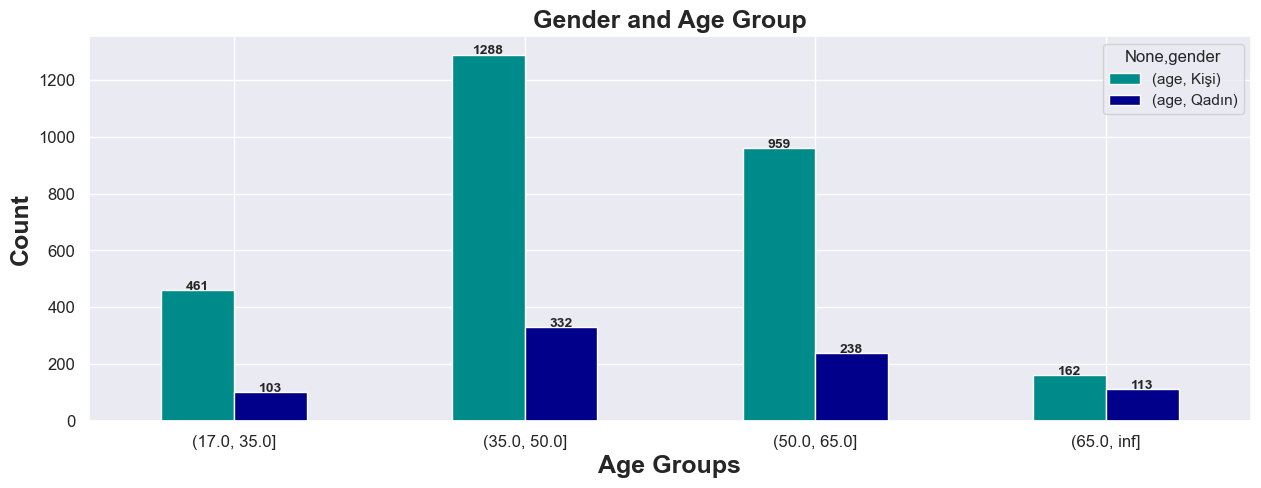

In [181]:
plt.figure()
ax=a.plot.bar(title="Gender and Age Group",color=["darkcyan","darkblue","pink"])
plt.title("Gender and Age Group",fontsize=18,fontweight="bold")
plt.xlabel("Age Groups",fontsize=18,fontweight="bold",rotation=0)
plt.ylabel("Count",fontsize=18,fontweight="bold",)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12);

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=10,fontweight="bold")
plt.show();

### Gender Status

In [182]:
df["gender"]=df["gender"].replace('Kişi','male')
df["gender"]=df["gender"].replace('Qadın','female')
df['gender']=df['gender'].replace(np.nan,'Null data')
df["gender"].isnull().sum()

0

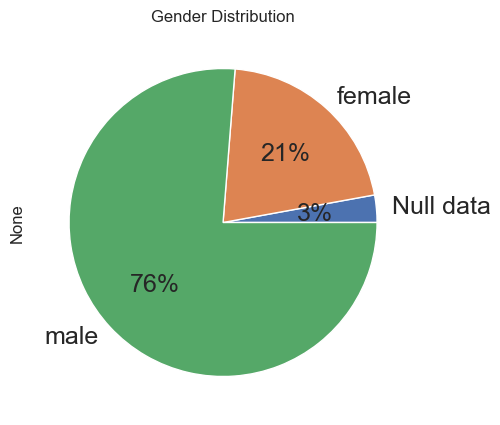

In [183]:
df.groupby("gender").size().plot(kind="pie",autopct="%1.0f%%",title="Gender Distribution",fontsize=18)
plt.show();

### Marital Status

In [184]:
def englishconverter(x):
    if x=='Evli':
        return 'Married'
    elif x=='Boşanmış':
        return 'Divorced'
    elif x=='Dul':
        return 'Widow'
    elif x=='Subay':
        return 'Single'
    else:
        return 'NA'

df['marital_status']=df['marital_status'].apply(lambda x: englishconverter(x))

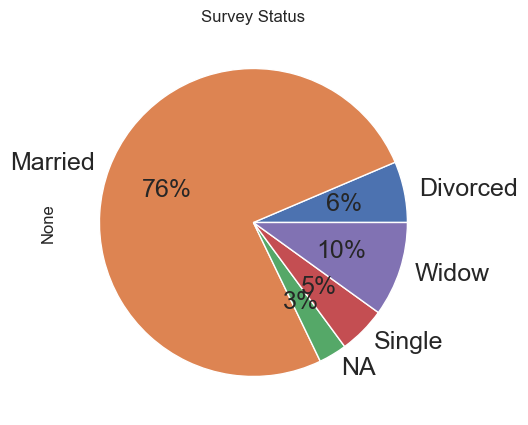

In [185]:
df.groupby("marital_status").size().plot(kind="pie",autopct="%1.0f%%",title="Survey Status",fontsize=18)
plt.show();

### Work Status

In [186]:
df["work_status"].unique()

array(['İşləmirəm', 'İşləyirəm', 'Evdar qadın', nan, 'günə muzdlu',
       'Kababçı', 'təsərrüfat', 'Pensioner', 'sürücü',
       'Şirkətdə Bənna işləyir', 'Gündəlik işlər', 'Pensianer',
       'Maşın ustası', 'Bənna işləyir', 'özəl şirkətdə ya.ayır',
       'pensiyaner.', 'pensiyaner', 'İş olanda günəmüzd işləyir',
       'heyvandarlıq', 'taksi sürücüsü', 'Təqaüdçüdür',
       'Fərdi təsərrüfat', 'Təqaüdə çıxıb',
       'Beynəlxalq Təşkilatda işləyir', 'Fəhlə işləyir', 'təsərüffat',
       'Özəl şirkətdə işləyir', 'Təqaüdçü', 'xırda təsərrüfat', 'Tələbə',
       'təqaüdçü', 'Avto-çilingər',
       '1-ci Qarabağ müharibəsi qazisi. pensiyaner',
       'Özəl şirkətdə bir həftədir işə başlayıb', 'fermer', 'teserrufat',
       'Günəmuzd', ':Təqaüdçü', 'ticarət', 'Ehtiyatda olan zabit',
       'Zabitdir', 'şəxsi biznes', 'Satıcı işləyir', 'kiçik biznes',
       'gunemuzd', 'pensiya', 'Satıcı', 'Maşın təmiri', 'kamaz sürücüsü',
       'Pensiya', 'Pensiyaci', 'Saç ustası', 'Fəhlə',
       'tə

In [187]:
df['work_status']=df['work_status'].replace(np.nan,'Null data')
print(len(list(df['work_status'].apply(lambda x:x.lower()).unique())))
sorted(list(df['work_status'].apply(lambda x:x.lower()).unique()))

108


['1-ci qarabağ müharibəsi qazisi. pensiyaner',
 ':təqaüdçü',
 'alver',
 'alverçi',
 'arı təsərrüfatı',
 'avto-çilingər',
 'aşbaz',
 'beynəlxalq təşkilatda işləyir',
 'bir şəxsin fermasında yaşayır,qoyunlarına baxır',
 'bənna',
 'bənna işləyir',
 'bərbər',
 'dərzi',
 'ehtiyatda olan zabit',
 'evdar qadın',
 'fehlelik',
 'fehlelik edir',
 'fermer',
 'fəhlə',
 'fəhlə işləyir',
 'fərdi iş',
 'fərdi təsərrüfat',
 'gundelik ishler',
 'gundelik ishlere gedir',
 'gundelik ishlerle meshguldur',
 'gunemuzd',
 'gündəlik',
 'gündəlik işlər',
 'gündəlik işləri',
 'gündəmuzd',
 'günə muzd',
 'günə muzd, təsərrüfat',
 'günə muzdlu',
 'günəmud',
 'günəmuzd',
 'günəmzud',
 'heyvandarlıq',
 'i̇ş olanda günəmüzd işləyir',
 'i̇şləmirəm',
 'i̇şləyirəm',
 'i̇şsizəm',
 'kababçı',
 'kamaz sürücüsü',
 'kiçik biznes',
 'kiçik mağaza',
 'kiçik təsərrüfat',
 'kənd təsərrüfatı',
 'maldarlıq',
 'maşın təmiri',
 'maşın ustası',
 'mebel ustası',
 'moyka',
 'mövsümi iş',
 'null data',
 'operator',
 'pensianer',
 'pens

In [188]:
df['work_status']=df['work_status'].apply(lambda x:x.lower())

mapper=['gundelik ishler',
 'gundelik ishlere gedir',
 'gundelik ishlerle meshguldur',
 'gunemuzd',
 'gündəlik',
 'gündəlik işlər',
 'gündəlik işləri',
 'gündəmuzd',
 'günə muzd',
 'günə muzd, təsərrüfat',
 'günə muzdlu',
 'günəmud',
 'günəmuzd',
 'günəmzud','fehlelik',
 'fehlelik edir', 'fəhlə',
 'fəhlə işləyir','i̇ş olanda günəmüzd işləyir']

df.loc[(df.work_status.str.contains('|'.join(mapper))),"work_status"]='hourly_work'

In [189]:
df['work_status']=df['work_status'].apply(lambda x:x.lower())

mapper1=[ 'alver',
 'alverçi','fərdi iş', 'kiçik biznes',
 'kiçik mağaza','xırda biznes',
 'xırda ticarət','şəxsi biznes',
 'şəxsi iş',
 'şəxsi mağaza', 'ticarət']

df.loc[(df.work_status.str.contains('|'.join(mapper1))),"work_status"]='own_business'

In [190]:
df['work_status']=df['work_status'].apply(lambda x:x.lower())

mapper2=[ ':təqaüdçü', 'pensianer',
 'pensioner',
 'pensiya',
 'pensiyaci',
 'pensiyaner',
 'pensiyaner.',
 'pensiyanerdi','tədaüdçü','təqaüd',
 'təqaüdçü',
 'təqaüdçüdür',
 'təqaüdə çıxıb',
 'təqaüt',
 'təqaütdçü',
 'təqaütçü',
 'təqüdçü', 'teqaud']

df.loc[(df.work_status.str.contains('|'.join(mapper2))),"work_status"]='pensioner'

In [191]:
df['work_status']=df['work_status'].apply(lambda x:x.lower())

mapper3=['fərdi təsərrüfat','kiçik təsərrüfat',
 'kənd təsərrüfatı', 'maldarlıq', 'heyvandarlıq', 'fermer', 'shexsi teserrufat', 'teserrufat', 'təssərüfat',
 'təsərrüafat',
 'təsərrüaftla məşğuldur',
 'təsərrüfat',
 'təsərrüfatla məşğuldu',
 'təsərrüfatla məşğuldur',
 'təsərüffat','xırda təsərrüfat']

df.loc[(df.work_status.str.contains('|'.join(mapper3))),"work_status"]='agricultural_works'

In [192]:
df['work_status']=df['work_status'].apply(lambda x:x.lower())

mapper4=['i̇şləmirəm', 'i̇şsizəm', 'ı- ci qarabağ müharibəsi əlilidi', 'tələbə', 'evdar qadın']

df.loc[(df.work_status.str.contains('|'.join(mapper4))),"work_status"]='no_work'

In [193]:
df['work_status']=df['work_status'].apply(lambda x:x.lower())

mapper5=['avto-çilingər','aşbaz','bir şəxsin fermasında yaşayır,qoyunlarına baxır',
 'bənna',
 'bənna işləyir',
 'bərbər', 'dərzi', 'kababçı',
 'kamaz sürücüsü',
 'maşın təmiri',
 'maşın ustası',
 'mebel ustası',
 'moyka',
 'mövsümi iş', 'qaynaqçı',
 'salonda işdiyir',
 'satıcı',
 'satıcı işləyir',
 'saç ustası',
 'sürücü',
 'taksi sürücüsü',
 'taxi','traktor sürür','usta',
 'yanacaq doldurma məntəsi','şirkətdə bənna işləyir']

df.loc[(df.work_status.str.contains('|'.join(mapper5))),"work_status"]='secondary_professions'

In [194]:
df['work_status']=df['work_status'].apply(lambda x:x.lower())

mapper6=['beynəlxalq təşkilatda işləyir','operator', 'özəl şirkətdə bir həftədir işə başlayıb','özəl şirkətdə işləyir','özəl şirkətdə ya.ayır', 'zabitdir', 'ehtiyatda olan zabit', 'i̇şləyirəm',"digər(qeyd edin)"]

df.loc[(df.work_status.str.contains('|'.join(mapper6))),"work_status"]='non-govern_company_works'

C:\Users\user\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [195]:
print(len(list(df['work_status'].unique())))
sorted_work_status=sorted(list(df['work_status'].unique()))
sorted_work_status

8


['agricultural_works',
 'hourly_work',
 'no_work',
 'non-govern_company_works',
 'null data',
 'own_business',
 'pensioner',
 'secondary_professions']

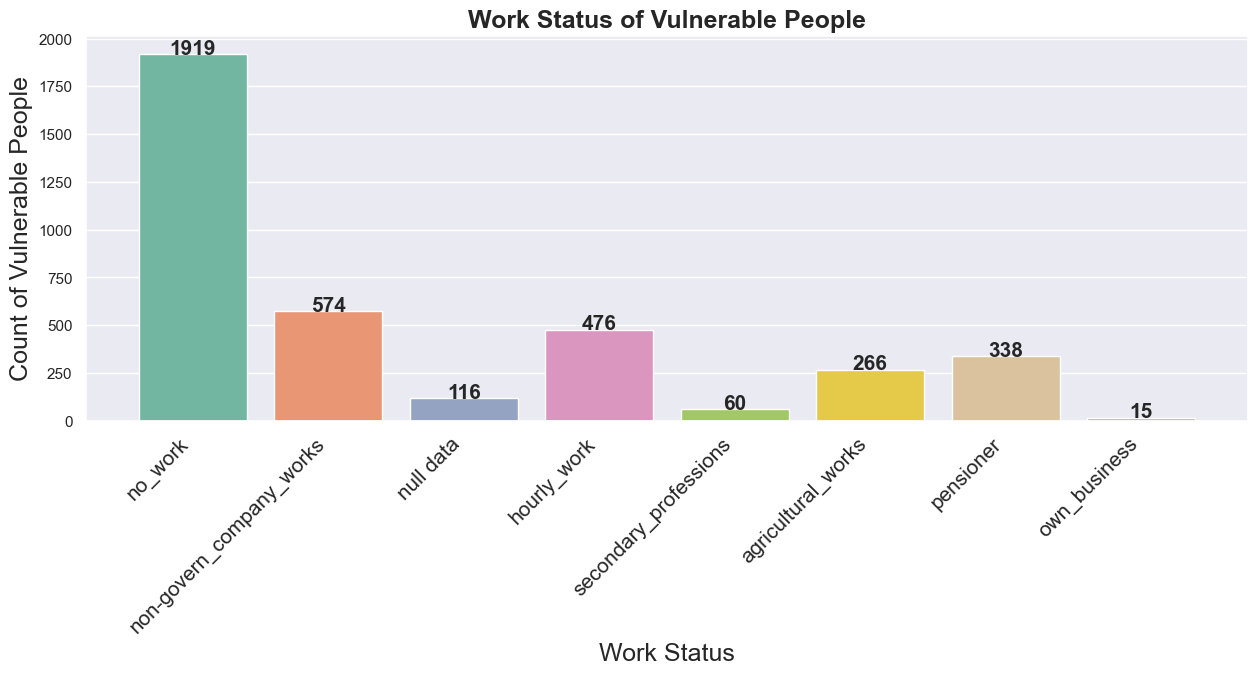

In [196]:
ax=sns.countplot(x="work_status",data=df,palette="Set2");
ax.set_title("Work Status of Vulnerable People", fontsize=18,fontweight="bold")
ax.set_xlabel("Work Status", fontsize=18)
ax.set_ylabel("Count of Vulnerable People", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",fontsize=15)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=15,fontweight="bold")
    
sns.set(rc={"figure.figsize":(15,5)})

ax.plot(figsize=(15,10))
plt.show()

### Family size

In [197]:
df["family_bin"]=pd.cut(df["family_size"],bins=[0,4,8,10,np.inf])

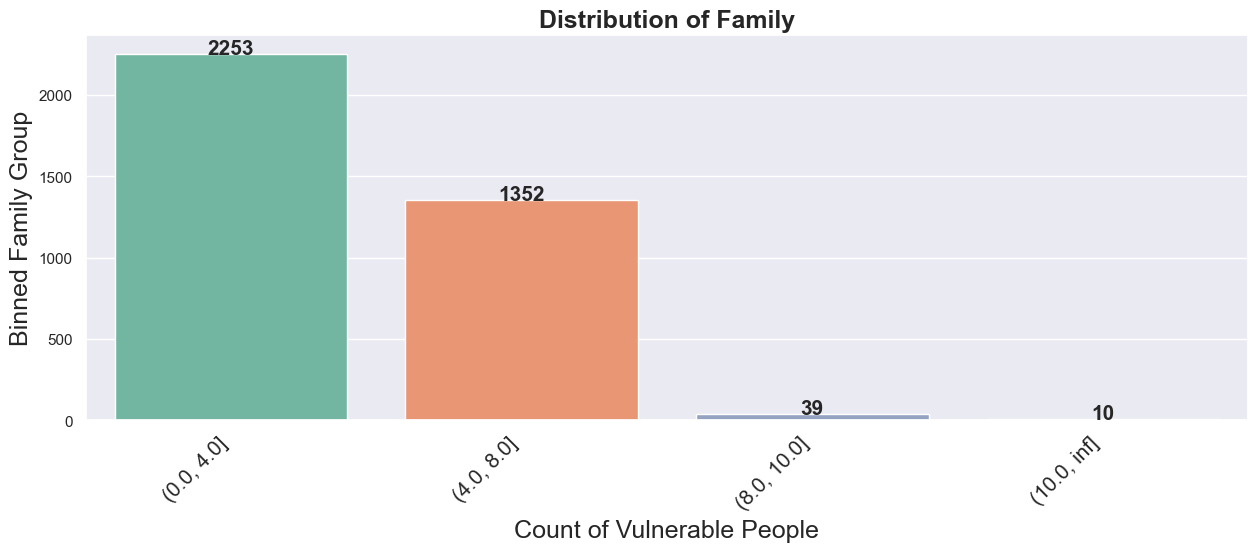

In [198]:
ax=sns.countplot(x="family_bin",data=df,palette="Set2");
ax.set_title("Distribution of Family", fontsize=18,fontweight="bold")
ax.set_xlabel("Count of Vulnerable People", fontsize=18)
ax.set_ylabel("Binned Family Group", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",fontsize=15)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=15,fontweight="bold")
    
sns.set(rc={"figure.figsize":(15,5)})
plt.show();

### War Impact

In [199]:
df["war_impact"].unique()

array(['Şiddətli təsir etdi', 'Az təsir etdi', nan,
       'Kifayət qədər təsir etdi', 'Təsir etmədi'], dtype=object)

In [200]:
df["war_impact"]=df["war_impact"].replace(np.nan,"Null data")

In [201]:
def englishconverter(k):
    if k=='Şiddətli təsir etdi':
        return 'Severe Impact'
    elif k=='Az təsir etdi':
        return 'Less Impact'
    elif k=='Kifayət qədər təsir etdi':
        return 'Enough Impact'
    elif k=='Təsir etmədi':
        return 'No Impact'
    else:
        return 'NA'

df['war_impact']=df['war_impact'].apply(lambda x: englishconverter(x))

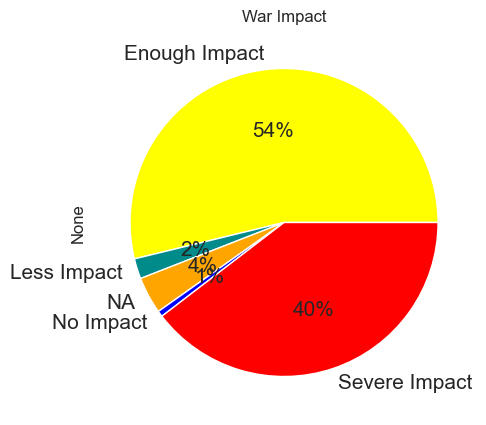

In [202]:
df.groupby("war_impact").size().plot(kind="pie",autopct="%1.0f%%",title="War Impact",fontsize=15,colors=["yellow","darkcyan","orange","blue","red"])
plt.show();

### Income Source

In [203]:
df['family_income']=df['family_income'].replace(np.nan,'Null data')

In [204]:
df['family_income']=df['family_income'].apply(lambda x:x.lower())
df['family_income']

0       ailə üzvlərinin sosial müavinətləri/təqaüdlər
1       ailə üzvlərinin sosial müavinətləri/təqaüdlər
2       ailə üzvlərinin sosial müavinətləri/təqaüdlər
3       ailə üzvlərinin sosial müavinətləri/təqaüdlər
4                                           null data
5       ailə üzvlərinin sosial müavinətləri/təqaüdlər
6       ailə üzvlərinin sosial müavinətləri/təqaüdlər
7       ailə üzvlərinin sosial müavinətləri/təqaüdlər
8       ailə üzvlərinin sosial müavinətləri/təqaüdlər
9       ailə üzvlərinin sosial müavinətləri/təqaüdlər
10      ailə üzvlərinin sosial müavinətləri/təqaüdlər
11                                          null data
12                                 aid olanları seçin
13                                 aid olanları seçin
14                                 aid olanları seçin
15                                          null data
16                                 aid olanları seçin
17                                 aid olanları seçin
18                          

In [205]:
a=["ailə üzvlərinin sosial müavinətləri/təqaüdlər", "aid olanları seçin"]

df.loc[(df.family_income.str.contains('|'.join(a))),"family_income"]="ailə üzvlərinin sosial müavinətləri/təqaüdlər"

In [206]:
print(len(list(df['family_income'].apply(lambda x:x.lower()).unique())))
sorted(list(df['family_income'].apply(lambda x:x.lower()).unique()))

2


['ailə üzvlərinin sosial müavinətləri/təqaüdlər', 'null data']

In [207]:
df['beneficiary_income']=df['beneficiary_income'].replace(np.nan,'Null data')
df['beneficiary_income']=df['beneficiary_income'].apply(lambda x:x.lower())

In [208]:
b=["tam işdən gələn gəlir","aid olanları seçin"]

df.loc[(df.beneficiary_income.str.contains('|'.join(b))),"beneficiary_income"]="Tam işdən gələn gəlir"

print(len(list(df['beneficiary_income'].apply(lambda x:x.lower()).unique())))
sorted(list(df['beneficiary_income'].apply(lambda x:x.lower()).unique()))

2


['null data', 'tam işdən gələn gəlir']

In [209]:
df['foreign_income']=df['foreign_income'].replace(np.nan,'Null data')
df['foreign_income']=df['foreign_income'].apply(lambda x:x.lower())

In [210]:
c=["aid olanları seçin"]

df.loc[(df.foreign_income.str.contains('|'.join(b))),"foreign_income"]="Xaricdə yaşayan ailə üzvlərindən gəlir"

print(len(list(df['foreign_income'].apply(lambda x:x.lower()).unique())))
sorted(list(df['foreign_income'].apply(lambda x:x.lower()).unique()))

2


['null data', 'xaricdə yaşayan ailə üzvlərindən gəlir']

In [211]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df2=pd.DataFrame(df,columns=["beneficiary_income","family_income","foreign_income"])
df2.head(10)

,beneficiary_income,family_income,foreign_income
0,Tam işdən gələn gəlir,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data
1,null data,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data
2,Tam işdən gələn gəlir,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data
3,null data,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data
4,null data,null data,null data
5,null data,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data
6,null data,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data
7,null data,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data
8,Tam işdən gələn gəlir,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data
9,Tam işdən gələn gəlir,ailə üzvlərinin sosial müavinətləri/təqaüdlər,null data


In [212]:
df["foreign_income"].value_counts()

null data                                 3759
Xaricdə yaşayan ailə üzvlərindən gəlir       5
Name: foreign_income, dtype: int64

In [213]:
df2["beneficiary_income"]=df2["beneficiary_income"].map({"Tam işdən gələn gəlir":1,"null data":0})
df2["family_income"]=df2["family_income"].map({"ailə üzvlərinin sosial müavinətləri/təqaüdlər":1,"null data":0})
df2["foreign_income"]=df2["foreign_income"].map({"Xaricdə yaşayan ailə üzvlərindən gəlir":1,"null data":0})

df2.head()

,beneficiary_income,family_income,foreign_income
0,1,1,0
1,0,1,0
2,1,1,0
3,0,1,0
4,0,0,0


In [214]:
df3=["benef+family_income","benef+foreign_income","fam+foreign_income","full_income","null_income"]

In [215]:
for col in df3:
    df2[col]=0
    
df2.loc[((df2.beneficiary_income==1)&(df2.family_income==1)),df3[0]]=1
df2.loc[((df2.beneficiary_income==1)&(df2.foreign_income==1)),df3[1]]=1
df2.loc[((df2.family_income==1)&(df2.family_income==1)),df3[2]]=1
df2.loc[((df2.beneficiary_income==1)&(df2.family_income==1)&(df2.foreign_income==1)),df3[3]]=1
df2.loc[((df2.beneficiary_income==0)&(df2.family_income==0)&(df2.foreign_income==0)),df3[4]]=1

df2.head()

,beneficiary_income,family_income,foreign_income,benef+family_income,benef+foreign_income,fam+foreign_income,full_income,null_income
0,1,1,0,1,0,1,0,0
1,0,1,0,0,0,1,0,0
2,1,1,0,1,0,1,0,0
3,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1


In [216]:
melted_df=pd.melt(df2[["beneficiary_income","family_income","foreign_income","benef+family_income","benef+foreign_income","fam+foreign_income","full_income","null_income"]])
melted_df.head()

,variable,value
0,beneficiary_income,1
1,beneficiary_income,0
2,beneficiary_income,1
3,beneficiary_income,0
4,beneficiary_income,0


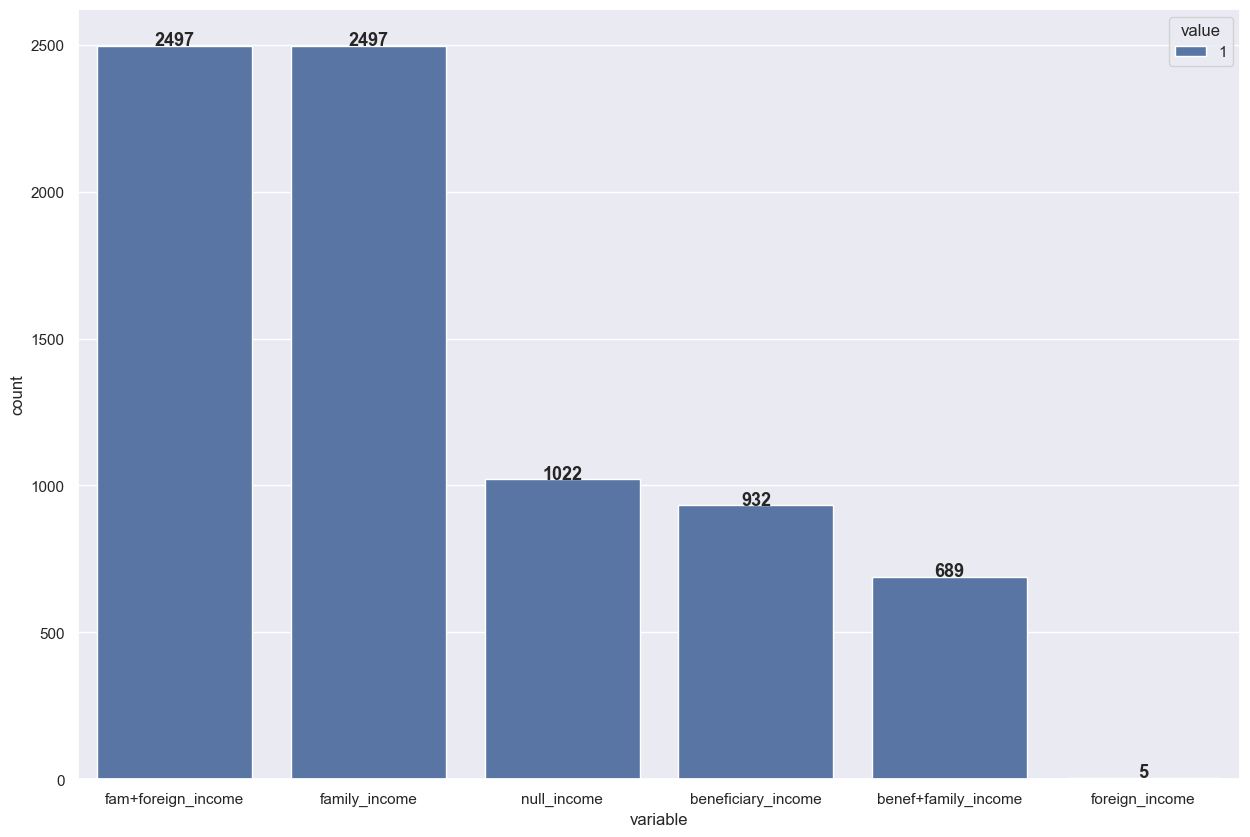

In [217]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=melted_df[melted_df.value==1],x="variable",hue="value",order=melted_df[melted_df.value==1].variable.value_counts().index);
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=13,fontweight="bold")
    
plt.show();

### Disability Degree

In [218]:
df["disability_degree"]=df["disability_degree"].replace(np.nan,"Null data")
df["disability_degree"]=df["disability_degree"].replace('Bəli','Yes')
df["disability_degree"]=df["disability_degree"].replace('Xeyr','No')

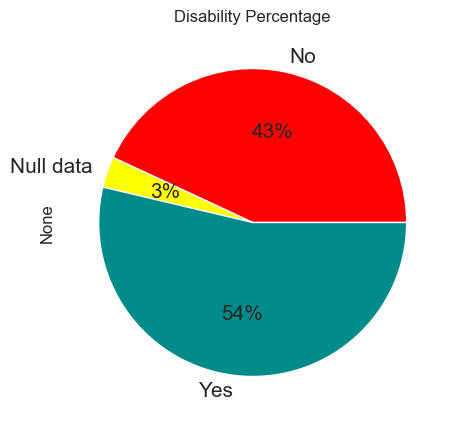

In [219]:
df.groupby("disability_degree").size().plot(kind="pie",autopct="%1.0f%%",title="Disability Percentage",fontsize=15,colors=["red","yellow","darkcyan"])
plt.show();

### Debt Status

In [220]:
df["debt_status"]=df["debt_status"].replace(np.nan,"Null data")
df["debt_status"]=df["debt_status"].replace('Bəli','Yes')
df["debt_status"]=df["debt_status"].replace('Xeyr','No')

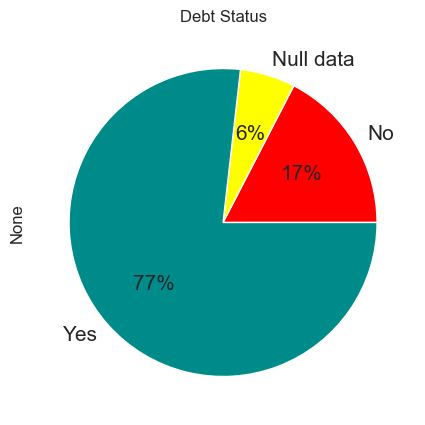

In [221]:
df.groupby("debt_status").size().plot(kind="pie",autopct="%1.0f%%",title="Debt Status",fontsize=15,colors=["red","yellow","darkcyan"])
plt.show();

In [222]:
df['debt_2others']=df['debt_2others'].replace(np.nan,'Null data')
df['debt_2others']=df['debt_2others'].apply(lambda x:x.lower())
df['debt_2others'].value_counts()

null data                   2700
aid olanları seçin:         1061
başqasından alınmış borc       3
Name: debt_2others, dtype: int64

In [223]:
a=["başqasından alınmış borc", "aid olanları seçin"]

df.loc[(df.debt_2others.str.contains('|'.join(a))),"debt_2others"]="başqasından alınmış borc"

print(len(list(df['debt_2others'].apply(lambda x:x.lower()).unique())))
sorted(list(df['debt_2others'].apply(lambda x:x.lower()).unique()))

2


['başqasından alınmış borc', 'null data']

In [224]:
df['debt_2bank']=df['debt_2bank'].replace(np.nan,'Null data')
df['debt_2bank']=df['debt_2bank'].apply(lambda x:x.lower())
df['debt_2bank'].value_counts()

null data                 2254
aid olanları seçin:       1507
ödənməmiş bank krediti       3
Name: debt_2bank, dtype: int64

In [225]:
b=["ödənməmiş bank krediti", "aid olanları seçin"]

df.loc[(df.debt_2bank.str.contains('|'.join(b))),"debt_2bank"]="ödənməmiş bank krediti"

print(len(list(df['debt_2bank'].apply(lambda x:x.lower()).unique())))
sorted(list(df['debt_2bank'].apply(lambda x:x.lower()).unique()))

2


['null data', 'ödənməmiş bank krediti']

In [226]:
df['debt_forrepairhome']=df['debt_forrepairhome'].replace(np.nan,'Null data')
df['debt_forrepairhome']=df['debt_forrepairhome'].apply(lambda x:x.lower())
df['debt_forrepairhome'].value_counts()

null data                              1986
aid olanları seçin:                    1777
zədələnmiş evin təmiri üçün xərclər       1
Name: debt_forrepairhome, dtype: int64

In [227]:
b=["zədələnmiş evin təmiri üçün xərclər", "aid olanları seçin"]

df.loc[(df.debt_forrepairhome.str.contains('|'.join(b))),"debt_forrepairhome"]="zədələnmiş evin təmiri üçün xərclər"

print(len(list(df['debt_forrepairhome'].apply(lambda x:x.lower()).unique())))
sorted(list(df['debt_forrepairhome'].apply(lambda x:x.lower()).unique()))

2


['null data', 'zədələnmiş evin təmiri üçün xərclər']

In [228]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df5=pd.DataFrame(df,columns=["debt_2others","debt_2bank","debt_forrepairhome"])
df5.head(10)

,debt_2others,debt_2bank,debt_forrepairhome
0,başqasından alınmış borc,null data,null data
1,null data,null data,null data
2,null data,ödənməmiş bank krediti,null data
3,null data,ödənməmiş bank krediti,null data
4,null data,null data,null data
5,null data,null data,null data
6,null data,null data,null data
7,null data,null data,null data
8,başqasından alınmış borc,null data,null data
9,başqasından alınmış borc,ödənməmiş bank krediti,null data


In [229]:
df5["debt_2others"]=df5["debt_2others"].map({"başqasından alınmış borc":1,"null data":0})
df5["debt_2bank"]=df5["debt_2bank"].map({"ödənməmiş bank krediti":1,"null data":0})
df5["debt_forrepairhome"]=df5["debt_forrepairhome"].map({"zədələnmiş evin təmiri üçün xərclər":1,"null data":0})

df5.head()

,debt_2others,debt_2bank,debt_forrepairhome
0,1,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [230]:
df6=["debts_2others+bank","debts_2others+reparing","debt_2bank+reparing","full_debt","null_debt"]

In [231]:
for col in df6:
    df5[col]=0
    
df5.loc[((df5.debt_2others==1)&(df5.debt_2bank==1)),df6[0]]=1
df5.loc[((df5.debt_2others==1)&(df5.debt_forrepairhome==1)),df6[1]]=1
df5.loc[((df5.debt_2bank==1)&(df5.debt_forrepairhome==1)),df6[2]]=1
df5.loc[((df5.debt_2others==1)&(df5.debt_2bank==1)&(df5.debt_forrepairhome==1)),df6[3]]=1
df5.loc[((df5.debt_2others==0)&(df5.debt_2bank==0)&(df5.debt_forrepairhome==0)),df6[4]]=1

df5.head()

,debt_2others,debt_2bank,debt_forrepairhome,debts_2others+bank,debts_2others+reparing,debt_2bank+reparing,full_debt,null_debt
0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [232]:
melted_df5=pd.melt(df5[["debt_2others","debt_2bank","debt_forrepairhome","debts_2others+bank","debts_2others+reparing","debt_2bank+reparing","full_debt","null_debt"]])
melted_df5.head()

,variable,value
0,debt_2others,1
1,debt_2others,0
2,debt_2others,0
3,debt_2others,0
4,debt_2others,0


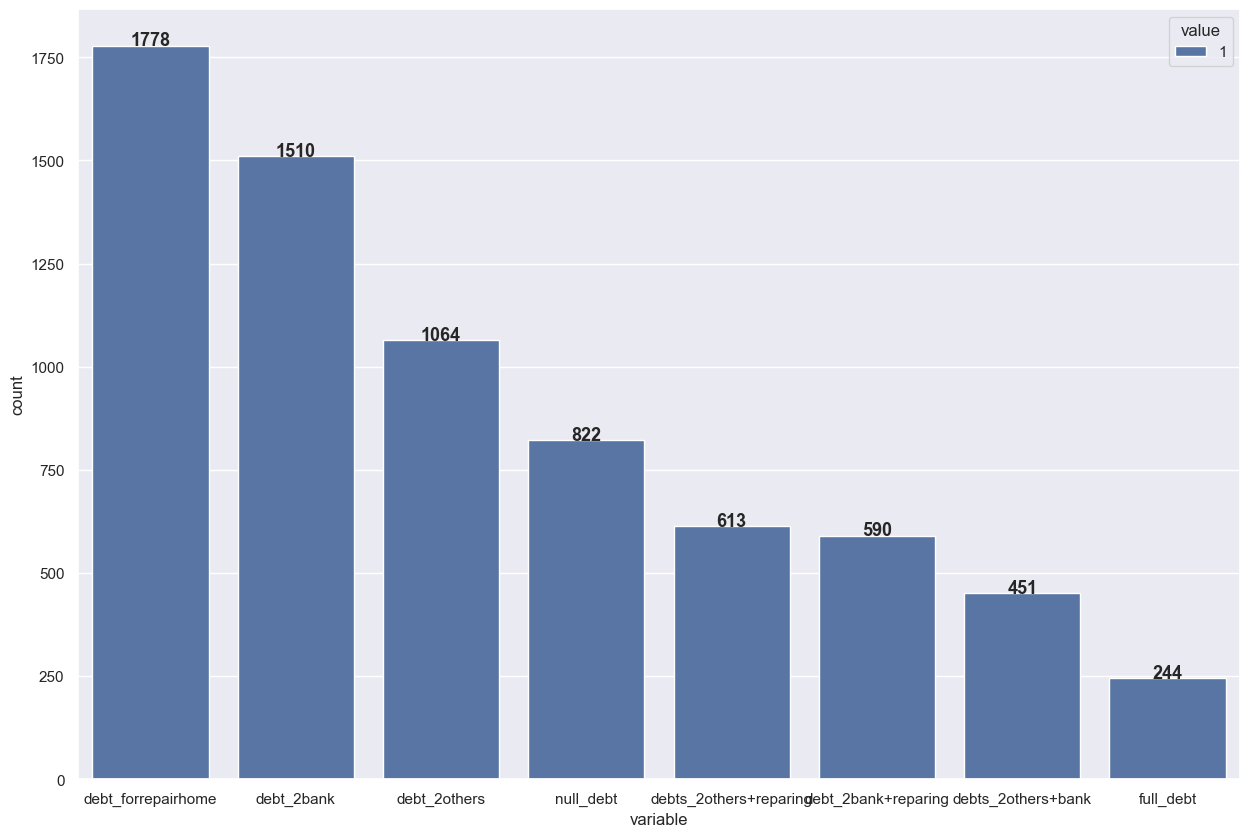

In [233]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=melted_df5[melted_df5.value==1],x="variable",hue="value",order=melted_df5[melted_df5.value==1].variable.value_counts().index);
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=13,fontweight="bold")
    
plt.show();

### Assistance source

In [235]:
df["assistance_status"]=df["assistance_status"].replace(np.nan,"Null data")
df["assistance_status"]=df["assistance_status"].replace('Bəli','Yes')
df["assistance_status"]=df["assistance_status"].replace('Xeyr','No')

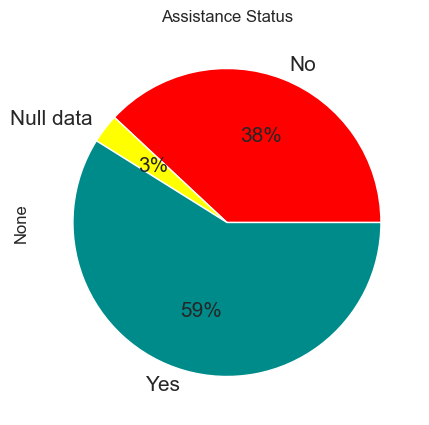

In [236]:
df.groupby("assistance_status").size().plot(kind="pie",autopct="%1.0f%%",title="Assistance Status",fontsize=15,colors=["red","yellow","darkcyan"])
plt.show();

In [237]:
df["assistance_source"].count()

3650

In [238]:
df["assistance_source"]=df["assistance_source"].replace(np.nan,"Null data")
df['assistance_source'].count()

3764

In [239]:
print(len(list(df['assistance_source'].apply(lambda x:x.lower()).unique())))
sorted(list(df['assistance_source'].apply(lambda x:x.lower()).unique()))

14


['almayıb',
 'beynəlxalq təşkilatlardan',
 'dövlət tərəfindən',
 'fhn',
 'heydər əliyev fondu',
 'hər ikisi',
 'i̇şlədiyi hərbi hissədən',
 'null data',
 'qızılxaç',
 'sadə vətəndaşlar',
 'türk qurumu',
 'türkiyədən gələn yardımlardan',
 'yaşat fondu',
 'yerli hökumət orqanlarından']

In [240]:
df["assistance_source"]=df["assistance_source"].replace('hər ikisi','Both local&intern.')
df["assistance_source"]=df["assistance_source"].replace('almayıb','No assistance')

In [241]:
df['assistance_source']=df['assistance_source'].apply(lambda x:x.lower())

mapper20=['dövlət tərəfindən','fhn', 'i̇şlədiyi hərbi hissədən','heydər əliyev fondu', 'sadə vətəndaşlar', 'yaşat fondu', 'yerli hökumət orqanlarından']

df.loc[(df.assistance_source.str.contains('|'.join(mapper20))),"assistance_source"]='local authorities'

In [242]:
df['assistance_source']=df['assistance_source'].apply(lambda x:x.lower())

mapper21=['beynəlxalq təşkilatlardan', 'qızılxaç', 'türk qurumu','türkiyədən gələn yardımlardan',]

df.loc[(df.assistance_source.str.contains('|'.join(mapper21))),"assistance_source"]='international organizations'

In [243]:
print(len(list(df['assistance_source'].unique())))
sorted_assistance_sources=sorted(list(df['assistance_source'].unique()))
sorted_assistance_sources

6


['almayıb',
 'both local&intern.',
 'hər ikisi',
 'international organizations',
 'local authorities',
 'null data']

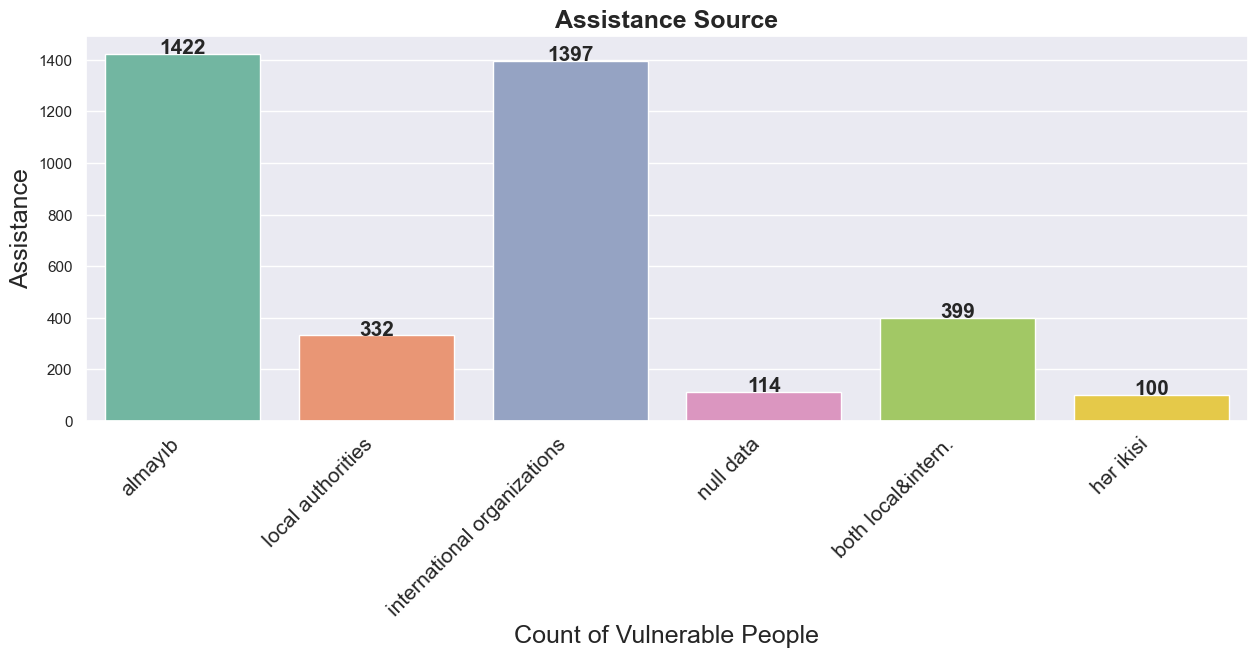

In [244]:
ax=sns.countplot(x="assistance_source",data=df,palette="Set2");
ax.set_title("Assistance Source", fontsize=18,fontweight="bold")
ax.set_xlabel("Count of Vulnerable People", fontsize=18)
ax.set_ylabel("Assistance", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",fontsize=15)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=15,fontweight="bold")
    
sns.set(rc={"figure.figsize":(15,5)})
plt.show();

### Needs

In [245]:
df['vulnerable_needs']=df['vulnerable_needs'].replace(np.nan,'Null data')
df['vulnerable_needs']=df['vulnerable_needs'].apply(lambda x:x.lower())
df['vulnerable_needs']

print(len(list(df['vulnerable_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['vulnerable_needs'].apply(lambda x:x.lower()).unique()))

2


['aid olanları seçin', 'null data']

In [246]:
m=['aid olanları seçin']

df.loc[(df.vulnerable_needs.str.contains('|'.join(m))),"vulnerable_needs"]="Vulnerable Needs"

print(len(list(df['vulnerable_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['vulnerable_needs'].apply(lambda x:x.lower()).unique()))

2


['null data', 'vulnerable needs']

In [247]:
df['food_needs']=df['food_needs'].replace(np.nan,'Null data')
df['food_needs']=df['food_needs'].apply(lambda x:x.lower())
df['food_needs']

print(len(list(df['food_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['food_needs'].apply(lambda x:x.lower()).unique()))

2


['aid olanları seçin', 'null data']

In [248]:
n=['aid olanları seçin']

df.loc[(df.food_needs.str.contains('|'.join(n))),"food_needs"]="food needs"

print(len(list(df['food_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['food_needs'].apply(lambda x:x.lower()).unique()))

2


['food needs', 'null data']

In [249]:
df['agriculture_needs']=df['agriculture_needs'].replace(np.nan,'Null data')
df['agriculture_needs']=df['agriculture_needs'].apply(lambda x:x.lower())
df['agriculture_needs']


print(len(list(df['agriculture_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['agriculture_needs'].apply(lambda x:x.lower()).unique()))

2


['aid olanları seçin', 'null data']

In [250]:
l=['aid olanları seçin']

df.loc[(df.agriculture_needs.str.contains('|'.join(l))),"agriculture_needs"]="agriculture needs"

print(len(list(df['agriculture_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['agriculture_needs'].apply(lambda x:x.lower()).unique()))

2


['agriculture needs', 'null data']

In [251]:
df['construction_needs']=df['construction_needs'].replace(np.nan,'Null data')
df['construction_needs']=df['construction_needs'].apply(lambda x:x.lower())
df['construction_needs']


print(len(list(df['construction_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['construction_needs'].apply(lambda x:x.lower()).unique()))

2


['aid olanları seçin', 'null data']

In [252]:
o=['aid olanları seçin']

df.loc[(df.construction_needs.str.contains('|'.join(o))),"construction_needs"]="construction needs"

print(len(list(df['construction_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['construction_needs'].apply(lambda x:x.lower()).unique()))

2


['construction needs', 'null data']

In [253]:
df['medical_needs']=df['medical_needs'].replace(np.nan,'Null data')
df['medical_needs']=df['medical_needs'].apply(lambda x:x.lower())
df['medical_needs']


print(len(list(df['medical_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['medical_needs'].apply(lambda x:x.lower()).unique()))

2


['aid olanları seçin', 'null data']

In [254]:
p=['aid olanları seçin']

df.loc[(df.medical_needs.str.contains('|'.join(p))),"medical_needs"]="medical needs"

print(len(list(df['medical_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['medical_needs'].apply(lambda x:x.lower()).unique()))

2


['medical needs', 'null data']

In [255]:
df["other2_needs"]

0                                            Nağd yardımı
1                                                     NaN
2                                                     NaN
3                        Ev lazımdır, evləri pis gündədir
4                                                     NaN
5                     Ev əşyaları, məktəbli ləvazimatları
6                                                     NaN
7                             evi yoxdur. kirayədə qalır.
8                                                     NaN
9                                                Nağd pul
10                                            evin olması
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15                                                    NaN
16                            Ən əsas ərzağa ehtiyacı var
17            

In [256]:
df['other2_needs']=df['other2_needs'].replace(np.nan,'Null data')

print(len(list(df['other2_needs'].apply(lambda x:x.lower()).unique())))
sorted(list(df['other2_needs'].apply(lambda x:x.lower()).unique()))

475


['0 azn',
 '1 dəfə boşanıb aliment ödüyür 270 azn',
 '1200 manat borcu var.',
 '150 azn',
 '2 ədəd iri buynuzlu heyvan tələf olub',
 '5000 borcu var. onun bağlanmağına ehtiyac var',
 '550 azn',
 '600 azn',
 'aid olanları seçin',
 'anasi bir oglu shehid olduqdan sonra problemleri yaranib.',
 'arı təssərüfatı',
 'arı təsərrüfatı',
 'bacısı və özü üçün müalicə.',
 'bacısının müalicəsi üçün xərc lazımdır',
 'bakıda ev almaq istəyirlər',
 'banka borc',
 'banka borcu var, əsas ehtiyac odur',
 'banka kredit borcu',
 'başını müalicə etdirmək',
 'borca görə maddi ehtiyac',
 'borcları bağlamaq üçün nağd pula ehtiyacı var',
 'borclarının ödənməsi',
 'borcu var, nağd pul olsa, onları bağlayardı',
 'böyük ehtiyacı yoxdur',
 'bəzi məişət əşyaları',
 'ciddi ehtiyacları yoxdur',
 'daha çox maddi dsətəyə ehtiyacı var',
 'daha çox maddi ehtiyac',
 'daha çox maddi ehtiyac,soyuducu',
 'dağılmış evin təmiri',
 'dağılmış evin əşyaları',
 'dağılmış evinin təmir olunması',
 'demək olar ki, heç nələri yoxdur',

In [257]:
df['other2_needs']=df['other2_needs'].apply(lambda x:x.lower())

mapper8=['0 azn','1 dəfə boşanıb aliment ödüyür 270 azn','100 azn','1200 manat borcu var.','150 azn', '5000 borcu var. onun bağlanmağına ehtiyac var','550 azn','600 azn','aid olanları seçin', 'banka borc','banka borcu var, əsas ehtiyac odur','banka kredit borcu', 'əsas maddi ehtiyac', 'özünün əməliyyatına maddi köməklik ehtiyacdı.', 'övladların müalicəsi üçün maddi',
 'övladlarının müalicəsi üçün maddi ehtiyac','uşağı həkimə aparmaq üçün maddi yardım', 'uşaqlara paltar, nağd pul, yemək', 'pul ehtiyacı','pul maddiyyat','pul yardim','pul yardimi','pul yardimi isteyir','pul yardimi isteyir, evini temir etdirmek isteyir',
 'pul yardimina ehtiyac var','pul yardimina ehtiyaci var','pul yardımı','pula ehtiyac','pula ehtiyac var', 'nə olsa, ehtiyacı var','nəsə köməklik olunsa, yaxşı olardı','nəsə yardım olunsa, yaxşı olardı','na\\d pula','nad pul','nadğd pul','naöd pul',
 'nağd','nağd pul','nağd pul lazımdır','nağd pul, arı təsərrüfatını genişləndirmək üçün','nağd pul, evin bərpasına etiyac var','nağd pul, hər şeyə','nağd pul, hər şeyə ehtiyacları var','nağd pul, uşaq pulu','nağd pul, uşaqlar üçün geyim','nağd pul, uşaqlar üçün paltar',
 'nağd pul, uşaqlara paltar','nağd pula','nağd pula ehtiyac var','nağd pula ehtiyacları var','nağd pula ehtiyacı var','nağd pula ehtiyacı var ki, borclarını bağlasın','nağd puı','nağd yardım','nağd yardım olsa, yaxşı olardı','nağd yardıma',
 'nağd yardımı','nağd yardımı olsa, daha yaxşı olar, krediti bağlaya bilərdik','nağd yardımı, oğlu eplepsiya xəstəsidir','nağd, paltar, kommunal borclar', 'kredit var','krediti bağlamağa','kreditlər bağlamaq üçün maddi ehtiyac','maddi',
 'maddi (borclar)','maddi (evinin üstünə yağış yağanda damır)','maddi (hamiləliklə əlaqədar həkimə gedir)','maddi (kredit)','maddi (müalicə üçün)','maddi (övladının ödəniş haqqı üçün)','maddi (övladının ödəniş haqqı)','maddi , ev əşyaları',
 'maddi ,ev əşyaları','maddi ,evinin təmir olunması','maddi ,məktəbli geyimi','maddi ,məktəbli ləvazimatları', 'maddi ,məktəbli ləvazimatları,geyimi','maddi cəhətdən','maddi cəhətdən ehtiyac böyükdür.','maddi cəhətdən köməklik olunsa, yaxşı olardı',
 'maddi dəstək.','maddi ehiyac, məktəbli geyimləri','maddi ehtiiyac','maddi ehtiyac','maddi ehtiyac (borclar)','maddi ehtiyac (borcları çoxdur),ev əşyaları','maddi ehtiyac (müalicə üçün)','maddi ehtiyac (müxtəlif krerditləri var onun ödənməsi üçün)',
 'maddi ehtiyac (övladı həkimə getməlidir)','maddi ehtiyac (şəhidin il mərasimi üçün)','maddi ehtiyac ,geyim','maddi ehtiyac ,məktəbli geyimi,ləvazimatları','maddi ehtiyac ,məktəbli ləvazimatları','maddi ehtiyac böyükdür','maddi ehtiyac var',
 'maddi ehtiyac çox böyükdür','maddi ehtiyac çoxdu','maddi ehtiyac, ev əşyaları','maddi ehtiyac, geyimlər','maddi ehtiyac, hələd məktəbli paltar ala bilmədiklərinə görə məktəbə gedə bilmir','maddi ehtiyac, məktəbli geyimlər','maddi ehtiyac, məktəbli geyimləri','maddi ehtiyac, məktəbli ləvazimatları','maddi ehtiyac, əşyalar',
 'maddi ehtiyac, əşyalara','maddi ehtiyac,dolanışığını təmin etmək üçün heyvan','maddi ehtiyac,ev əşyaları','maddi ehtiyac,ev əşyaları,evin təmir olunması',
 'maddi ehtiyac,məktəbli geyimi',
 'maddi ehtiyac,məktəbli ləvazimatları',
 'maddi ehtiyac,təzyiq aparatı',
 'maddi ehtiyac,uşaq üçün geyim',
 'maddi ehtiyac,uşaqlar üçün geyim,məktəbli ləvazimatları',
 'maddi ehtiyac. borclar çoxdu',
 'maddi ehtiyac. qış tədarükü',
 'maddi ehtiyacları var',
 'maddi ehtiyacı var',
 'maddi ehtiytac',
 'maddi köməklik',
 'maddi sıxıntılar',
 'maddi vəziyyət çox pisdir.',
 'maddi yardım',
 'maddi yardıma',
 'maddi çətinlik',
 'maddi çətinlik.',
 'maddi( külli miqdarda borcuları)',
 'maddi, məktəblin ləvazimatları',
 'maddi,dolanışıq',
 'maddi,dolanışıq üçün hər şey',
 'maddi,ev əşyaları',
 'maddi,ev əşyaları,məktəbli ləvazimatları',
 'maddi,geyim',
 'maddi,məktəb geyimi,ləvazmiatları',
 'maddi,məktəbli geyimi',
 'maddi,məktəbli geyimi,ləvazimatları',
 'maddi,məktəbli geyimləri',
 'maddi,məktəbli ləvazimatları',
 'maddi,məktəbli paltarı,ləvazimatları',
 'maddi,mətbəx əşyaları',
 'maddi,təmizlik vasitələri(paraşok,sabun)',
 'maddiyat sarıdan əziyyət çəkirlər',
 'maddiyyat ,ev avadanlığı',
 'madi',
 'madi ehtiyac', 'hər şey',
 'hər şeyə',
 'hər şeyə ehtiyac var',
 'hər şeyə ehtiyacları var',
 'hər şeyə ehtiyacı var',
 'hər şəy',
 'hər şəyə ehtiyac var','her bir shey',
 'her biri',
 'her biri, pul yardimi',
 'her shey',
 'her sheye ehtiyac var, ishle temin olunmaq isteyir ogullarinin',
 'her sheye ehtiyaci var',
 'her sheye ehtiyaclari var, evleri yoxdur, sulari yox','2 ədəd iri buynuzlu heyvan tələf olub', 'arı təssərüfatı',
 'arı təsərrüfatı', 'borclarının ödənməsi', 'heyvan dolanışıq təmin etmək üçün',
 'heyvan olsa yaxshi olar',
 'heyvan saxlamaq üçün tovla ehtiyacdı.',
 'heyvan yardımı olsa, yaxşı olardı',
 'heyvan,toyuq cücə',
 'heyvan-qara',
 'heyvan-qara köməklik olunsa, yaxşı olardı',
 'heyvan-qara olsa, yaxşı olardı',
 'heyvan-qara verilsə, saxlayardıq',
 'heyvan-qara və toyuq cücə tələf olub, ot kipləri sahədə qalıb, onu götürə bilməyib',
 'heyvan-qaraya ehtiyacı var',
 'heyvandarlıqla mə.ğul olmaq üçün heyvan',
 'heyvandarlığını davam etdirmək üçün, mal-qara istəyir ki, başın qatsın, dolanışığını təmin etsin',
 'heyvanlarını salmaq üçün yeri yoxdur','dolanışığı təmin etmək üçün heyvan',
 'dolanışığını təmin etmək heyvan olsa yaxşı olar',
 'dolanşıq','demək olar ki, heç nələri yoxdur',
 'dolanışıq',
 'dəyən zərər ödənsə, yaxşı olardı','i̇çməli su ehtiyacı,təsərrüfat üçün suvarma suyu', 'kommunal xərclər',
 'kredit borcu çoxdu. evdə ağır xəstələr var, müalicəsi çoxdu',
 'maddi ehtiyac',
 'mal,heyvan','maddi ehtiyac','təsərrüfata köməklik olunsa, yaxşı olardı',
 'təsərrüfatı artırmaq.',
 'usta kimi fəaliyyət göstərmək üçün ləvazimat lazımdır', 'yalnız ərzaq',
 'yemək',
 'ən əsas ərzağa ehtiyacı var', 'nagd pul','oğlu əsgərdi ona pul, pasılka ehtiyacdı',
 'qeyri erzaq mehsullari, pul', 'tələf olan qoyunları']

df.loc[(df.other2_needs.str.contains('|'.join(mapper8))),"other2_needs"]='maddi ehtiyac'

C:\Users\user\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [258]:
df['other2_needs']=df['other2_needs'].apply(lambda x:x.lower())

mapper9=['anasi bir oglu shehid olduqdan sonra problemleri yaranib.',
 'bacısı və özü üçün müalicə.',
 'bacısının müalicəsi üçün xərc lazımdır', 'başını müalicə etdirmək', 'mualice uchun ehtiyac var',
 'mualice xerclerini qarshilasinlar', 'əsas müalicəsi','həkimə getmək üçün pul lazımdır', 'müalicə', 'uşaqların müalicəsi xərclər','yoldaşını və oğlunu həkimə aparmaq.',
 'yoldaşının sağlamlığı', 'qızının gözü əməliyyat olunmalıdır','sağlıq']

df.loc[(df.other2_needs.str.contains('|'.join(mapper9))),"other2_needs"]='Müalicə'

In [259]:
df['other2_needs']=df['other2_needs'].apply(lambda x:x.lower())

mapper11=['bəzi məişət əşyaları', 'dağılmış evin təmiri',
 'dağılmış evin əşyaları',
 'dağılmış evinin təmir olunması', 'ev damir, ev temiri isteyir',
 'ev dağılıb və təmirə ehtiyacı var',
 'ev ehtiyacı',
 'ev eshyalari ve ev temiri',
 'ev eshyalari-paltaryuyan, tv',
 'ev esyalari',
 'ev isteyir',
 'ev lazımdır, evləri pis gündədir',
 'ev təmir olunmalıdır',
 'ev təmir olunsa, yaxşı olardı',
 'ev təmiri',
 'ev ve ev temiri',
 'ev yoxdur',
 'ev yoxdur, atayla qalır, evə ehtiyac var.',
 'ev yoxdur, evlə təmin olunsa, yaxşı olarsı',
 'ev əşyaları',
 'ev əşyaları (müharibə müddətində məhv olub)',
 'ev əşyaları zərər çəkib, amma təzminat verilməyib',
 'ev əşyaları, məktəbli ləvazimatları',
 'ev əşyaları,pul',
 'ev əşyalarına',
 'ev əşyalarına ehtiyac var',
 'ev əşyalarına ehtiyacı var',
 'ev əşyalarına zərər dəyib',
 'ev əşyası',
 'ev əşylaraı,dolanışıq',
 'evdə kirayədə qalıb',
 'evi dagilib',
 'evi dagilib, ev isteyir',
 'evi düzəlsə, yaxşı olardı',
 'evi təmir edəndə borca girib, onun ödənişlərində köməklik olunsa, yaxşı olardı',
 'evi təmir etmək lazımdır',
 'evi yoxdu daxalda yaşayır. evə ehtiyacı var',
 'evi yoxdu, bağçada qalır. evə ehtiyacı var.',
 'evi yoxdur',
 'evi yoxdur, ev isteyir',
 'evi yoxdur, ishleri yoxdur',
 'evi yoxdur. kirayədə qalır.',
 'evi zerer gorduyune gore evinin temir olmasini isteyir',
 'evimiz yoxdur',
 'evin bərpası.',
 'evin olması',
 'evin tavanı zədəlidi.',
 'evin təmir edilməsinə ehtiyac var',
 'evin təmiri',
 'evin təmiri və əşyası',
 'evin təmiri əsas ehtiyacdı.',
 'evin təmirinə ehtiyac var',
 'evin əşyaları',
 'evinin təmiri',
 'evinin təmirə ehtiyacı var',
 'evinin üstünün təmir olunması,yağış yağanda evin içinə damır',
 'evle bagli sixinti',
 'evle temin olunma',
 'evləri təmir olunmalıdır',
 'evləri yarımçıq qalıb hər iki övladının onların tamamlanması',
 'evləri zərər dəyib, daxılda yaşamağa məcbur olub, evləri yoxdur',
 'evlərinin üstü örtülməyinə',
 'evə ehtiyac var',
 'evə ehtiyac var, vaqonda yaşayırıq.',
 'evə ehtiyac var. kərpiç daxmada yaşayırlar',
 'evə ehtiyacı var',
 'evə ehtiyacı var.',
 'evə xeyli zərər dəyib','bakıda ev almaq istəyirlər', 'ev',
 'ev və məişət əşyaları', 'mebelləri belə yoxdur',
 'moyka aparatı','müharibə vaxtı məhv olmuş əşyalar-soyuducu,paltaryuyan,yataq otağı mebelləri,uşaq çarpayısı','müharibə vaxtı zərər görən evə görə tikinti işlərinə lazımdır','məişət avadanlıqları', 'məişət əşyaları','yaşamaq üçün evləri yoxdur',
'yaşamağa yer','mənzil şəraiti', 'siginacaq',
 'soyuqucu ehtiyacı var',
 'sınmış əşyalar']
    
    
df.loc[(df.other2_needs.str.contains('|'.join(mapper11))),"other2_needs"]='ev və məişət əşyaları'

In [260]:
df['other2_needs']=df['other2_needs'].apply(lambda x:x.lower())

mapper12=[ 'dolanışıq ,məktəbli geyimi',
 'dolanışıq ,məktəbli geyimi,ləvazimatları',
 'dolanışıq ,məktəbli ləvazimatları',
 'dolanışıq tələbat', 'dolanışıq üçün',
 'dolanışıq üçün hə şey,məktəbli geyimi,ləvazimatları',
 'dolanışıq üçün lazımlı şeylər',
 'dolanışıq,geyim',
 'dolanışıq,məktəbli geyimi',
 'dolanışıq,məkətbli geyimi', 'geyim',
 'geyim, əşyalar',
 'geyime ehtiyac var',
 'geyimlər',
 'geyimlər, ev ləvazimatları',
 'gigiyena məhsulları',
 'gundelik telebatlar',
 'gündəlik',
 'gündəlik tələbat',
 'gündəlik tələbat ,geyim',
 'gündəlik tələbat ,məktəbli geyimi',
 'gündəlik tələbat,məktəbli geyimi', 'məktəb paltarı',
 'məktəb vəsaitləri',
 'məktəbli geyim',
 'məktəbli geyimi',
 'məktəbli geyimi,dolanışıq',
 'məktəbli geyimi,gündəlik tələbat',
 'məktəbli geyimi,həkim üçü pul',
 'məktəbli geyimi,ləvazimatları',
 'məktəbli geyimi,ləvazimatları almaq üçün pul',
 'məktəbli geyimi,ləvazimatları,dolanışıq',
 'məktəbli geyimi,ləvazimatı',
 'məktəbli geyimlər',
 'məktəbli geyimləri',
 'məktəbli ləvazimatları',
 'məktəbli ləvazimatları ,geyim ,toyuq cücə', 'uşaqlar üçün dərs vəsaitləri,paltarlar',
 'uşaqlar üçün paltar',
 'uşaqlara pal-paltara',
 'uşaqlara paltar', 'uşağa aid məişət şeylərinə ehtiyacı var']

df.loc[(df.other2_needs.str.contains('|'.join(mapper12))),"other2_needs"]='məktəbli Ləvazimatları'

In [261]:
df['other2_needs']=df['other2_needs'].apply(lambda x:x.lower())

mapper13=[ 'böyük ehtiyacı yoxdur',
 'ciddi ehtiyacları yoxdur','ehtiyac yoxdu',
 'ehtiyac yoxdur',
 'ehtiyacları yoxdur',
 'ehtiyacı yoxdur',
 'elə böyük ehtiyac yoxdur',
 'elə böyük ehtiyac yoxdur.',
 'elə böyük ehtiyacları yoxdur',
 'elə böyük ehtiyacı yox',
 'elə böyük ehtiyacı yoxdur',
 'elə böyük ehtiyacı yoxdur,öz torpaqlarına qayıtmaq', 'hal hazırda heç bir ehtiyacı yoxdur',
 'hec bir shey',
 'hec biri',
 'hech bir',
 'hech bir shey',
 'hech biri',
 'heç bir yardıma ehtiyacı yoxdur',
 'heç bir şeyə ehtiyac yoxdur',
 'heç nə', 'vətən həsrəti',
 'vətənimizə qayıtmaq.', 'öz torpaqlarına qayıtmaq','yoxdur', 'torpaqlarına geri qayıtmaq istəyir', 'mənəvi dəstək']

df.loc[(df.other2_needs.str.contains('|'.join(mapper13))),"other2_needs"]='ehtiyac yoxdur'

In [262]:
df['other2_needs']=df['other2_needs'].apply(lambda x:x.lower())

mapper14=[ 'ishle temin olunma',
 'ishsizlik',
 'iş ehtiyacı',
 'iş ehtiyacıdı',
 'işsizlik. işə ehtiyac var.',
 'işə ehtiyac var',
 'i̇shle temin olunma',
 'i̇ş ehtiyacı',
 'i̇ş olsa, çox yaxşı olardı',
 'i̇ş təminatı olunsa, yaxşı olardı',
 'i̇ş yeri olsa, işləyərdi',
 'i̇şlə təmin olunmaq',
 'i̇şlə təmin olunsa, yaxşı olardı',
 'i̇şsizlik',
 'i̇şə ehtiyacları var',
 'i̇şə ehtiyacı var', 'ovladlarının işsizliyi',
 'oz torpagina qayitmaq isteyir ve ishle temin olmaq isteyir',
 'oğlanları işsizdi, işə ehtiyac var',
 'oğlanlarına iş ehtiyacdı',
 'oğlu işində köməklik olunsa, yaxşı olardı',
 'oğlu işsizlikdən əziyyət çəkir', 'oğluna iş ehtiyacdı',
 'oğlunun işlə təmin olunması', 'qızına iş ehtiyacdı','özü hüquqşunasdı lakin işləmir, işə ehtiyacı var.','hər hansı bir iş lazımdır', 'övladlar üçün iş ehtiyacdı',
 'övladının işlə təmin olunması']

df.loc[(df.other2_needs.str.contains('|'.join(mapper14))),"other2_needs"]='işlə təmin olunma'

In [263]:
print(len(list(df['other2_needs'].unique())))
sorted_other2_needs=sorted(list(df['other2_needs'].unique()))
sorted_other2_needs

7


['ehtiyac yoxdur',
 'ev və məişət əşyaları',
 'işlə təmin olunma',
 'maddi ehtiyac',
 'müalicə',
 'məktəbli ləvazimatları',
 'null data']

In [264]:
df3=pd.DataFrame(df,columns=["vulnerable_needs","food_needs","agriculture_needs","construction_needs","medical_needs",'no_needs','house_needs','workplace_need','money_need','surgery_need','school_need','null_data'])
df3.head(5)

,vulnerable_needs,food_needs,agriculture_needs,construction_needs,medical_needs,no_needs,house_needs,workplace_need,money_need,surgery_need,school_need,null_data
0,null data,null data,null data,null data,medical needs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vulnerable Needs,food needs,null data,null data,medical needs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,null data,null data,null data,construction needs,null data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vulnerable Needs,food needs,null data,null data,medical needs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vulnerable Needs,food needs,null data,null data,medical needs,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
df3.loc[(df.other2_needs=="ehtiyac yoxdur"),["no_needs"]]="yes"
df3.loc[(df.other2_needs=="ev və məişət əşyaları"),["house_needs"]]="yes"
df3.loc[(df.other2_needs=="işlə təmin olunma"),["workplace_need"]]="yes"
df3.loc[(df.other2_needs=="maddi ehtiyac"),["money_need"]]="yes"
df3.loc[(df.other2_needs=="müalicə"),["surgery_need"]]="yes"
df3.loc[(df.other2_needs=="məktəbli ləvazimatları"),["school_need"]]="yes"

del df3["null_data"]


df3.head(10)

,vulnerable_needs,food_needs,agriculture_needs,construction_needs,medical_needs,no_needs,house_needs,workplace_need,money_need,surgery_need,school_need
0,null data,null data,null data,null data,medical needs,NaN,NaN,NaN,yes,NaN,NaN
1,Vulnerable Needs,food needs,null data,null data,medical needs,NaN,NaN,NaN,NaN,NaN,NaN
2,null data,null data,null data,construction needs,null data,NaN,NaN,NaN,NaN,NaN,NaN
3,Vulnerable Needs,food needs,null data,null data,medical needs,NaN,yes,NaN,NaN,NaN,NaN
4,Vulnerable Needs,food needs,null data,null data,medical needs,NaN,NaN,NaN,NaN,NaN,NaN
5,null data,food needs,null data,null data,null data,NaN,yes,NaN,NaN,NaN,NaN
6,Vulnerable Needs,food needs,null data,null data,medical needs,NaN,NaN,NaN,NaN,NaN,NaN
7,null data,null data,null data,null data,null data,NaN,yes,NaN,NaN,NaN,NaN
8,Vulnerable Needs,food needs,agriculture needs,null data,medical needs,NaN,NaN,NaN,NaN,NaN,NaN
9,null data,null data,null data,null data,null data,NaN,NaN,NaN,yes,NaN,NaN


In [266]:
df3["vulnerable_needs"]=df3["vulnerable_needs"].map({"Vulnerable Needs":1,"null data":0})
df3["food_needs"]=df3["food_needs"].map({"food needs":1,"null data":0})
df3["agriculture_needs"]=df3["agriculture_needs"].map({"agriculture needs":1,"null data":0})
df3["construction_needs"]=df3["construction_needs"].map({"construction needs":1,"null data":0})
df3["medical_needs"]=df3["medical_needs"].map({"medical needs":1,"null data":0})
df3["no_needs"]=df3["no_needs"].map({"yes":1,np.nan:0})
df3["house_needs"]=df3["house_needs"].map({"yes":1,np.nan:0})
df3["workplace_need"]=df3["workplace_need"].map({"yes":1,np.nan:0})
df3["money_need"]=df3["money_need"].map({"yes":1,np.nan:0})
df3["surgery_need"]=df3["surgery_need"].map({"yes":1,np.nan:0})
df3["school_need"]=df3["school_need"].map({"yes":1,np.nan:0})

df3.head(10)

,vulnerable_needs,food_needs,agriculture_needs,construction_needs,medical_needs,no_needs,house_needs,workplace_need,money_need,surgery_need,school_need
0,0,0,0,0,1,0,0,0,1,0,0
1,1,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0
6,1,1,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0
8,1,1,1,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0


In [267]:
melted_df1=pd.melt(df3[["vulnerable_needs","food_needs","agriculture_needs","construction_needs","medical_needs",'no_needs','house_needs','workplace_need','money_need','surgery_need','school_need']])
melted_df1.head()

,variable,value
0,vulnerable_needs,0
1,vulnerable_needs,1
2,vulnerable_needs,0
3,vulnerable_needs,1
4,vulnerable_needs,1


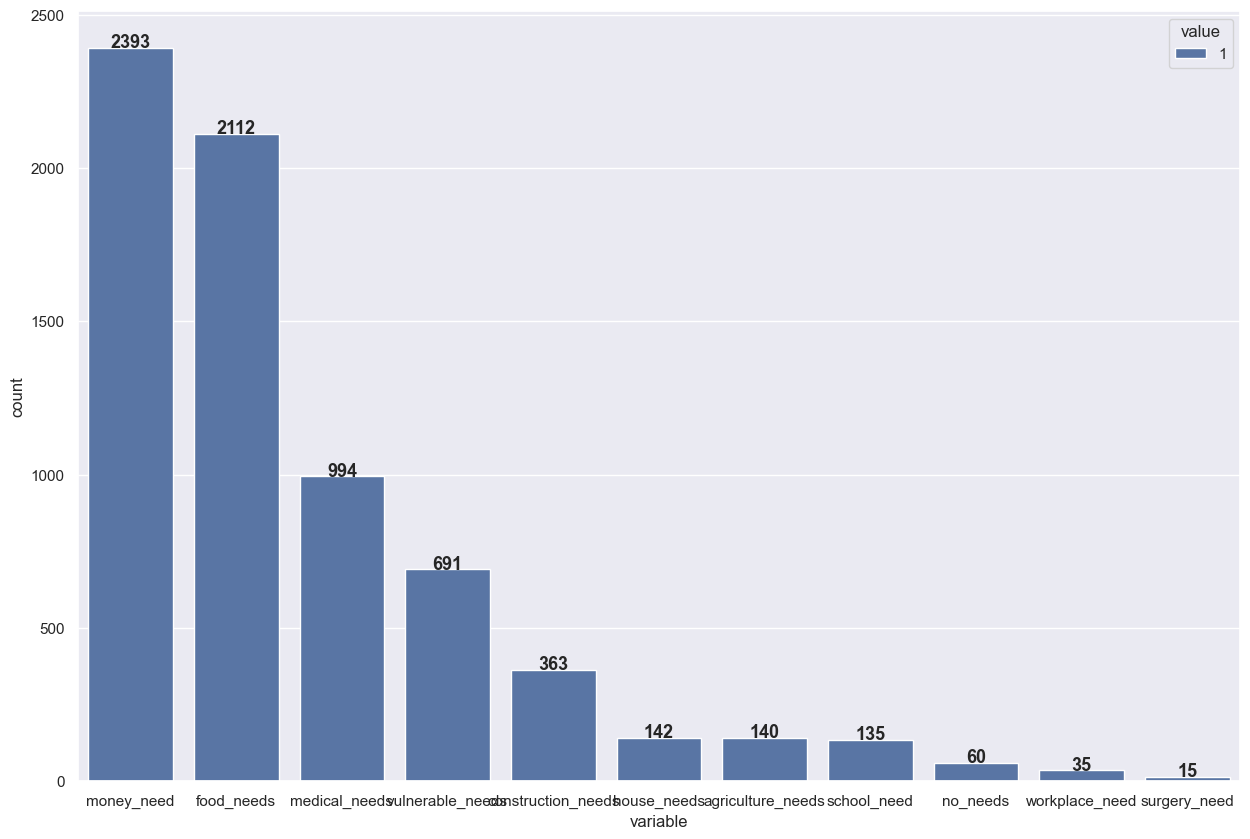

In [268]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=melted_df1[melted_df1.value==1],x="variable",hue="value",order=melted_df1[melted_df1.value==1].variable.value_counts().index);
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=13,fontweight="bold")
plt.show();

In [269]:
df3["sum_needs"]=df3.sum(axis=1)
df3.head(10)

,vulnerable_needs,food_needs,agriculture_needs,construction_needs,medical_needs,no_needs,house_needs,workplace_need,money_need,surgery_need,school_need,sum_needs
0,0,0,0,0,1,0,0,0,1,0,0,2
1,1,1,0,0,1,0,0,0,0,0,0,3
2,0,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0,1,0,1,0,0,0,0,4
4,1,1,0,0,1,0,0,0,0,0,0,3
5,0,1,0,0,0,0,1,0,0,0,0,2
6,1,1,0,0,1,0,0,0,0,0,0,3
7,0,0,0,0,0,0,1,0,0,0,0,1
8,1,1,1,0,1,0,0,0,0,0,0,4
9,0,0,0,0,0,0,0,0,1,0,0,1


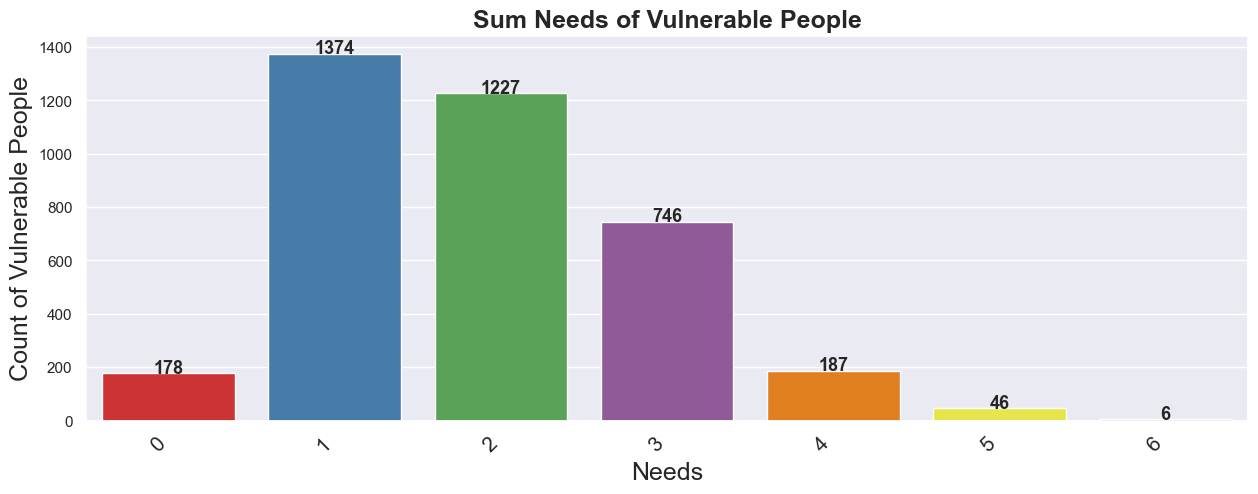

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.countplot(x="sum_needs",data=df3,palette="Set1");
ax.set_title("Sum Needs of Vulnerable People", fontsize=18,fontweight="bold")
ax.set_xlabel("Needs", fontsize=18)
ax.set_ylabel("Count of Vulnerable People", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",fontsize=15)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=13,fontweight="bold")
    
sns.set(rc={"figure.figsize":(15,5)})
plt.show();

### Monthly Income

In [272]:
df['monthly_income_old']=df['monthly_income']

In [273]:
df[['monthly_income_old','monthly_income']].head()

,monthly_income_old,monthly_income
0,0 AZN,0 AZN
1,0 AZN,0 AZN
2,700 AZN,700 AZN
3,0 AZN,0 AZN
4,0 AZN,0 AZN


In [274]:
import re

df['monthly_income']=df['monthly_income'].apply(lambda x: re.sub(r'[^-\d\s]*','',str(x)).strip())
filter_for_sum=df.monthly_income.str.contains(pat="\s")

In [275]:
df["monthly_income"].unique()

array(['0', '700', '', '250', '260', '270', '600', '236', '206', '249',
       '235', '1000', '500', '300', '280', '240', '350', '317', '400',
       '238    262', '345', '246', '666   1000', '407', '460', '439',
       '200', '850', '330', '560', '349', '250   400', '178', '666',
       '130', '490', '290', '470', '258', '430', '368', '270    420',
       '497', '700  500', '210', '260    300', '520', '380', '150', '450',
       '650', '283', '33', '236   236', '733', '220', '320', '377', '840',
       '140', '90', '327', '770', '132', '720', '805', '180', '360',
       '750', '99', '498', '410', '124   480   290', '400    370',
       '370    400', '771', '573', '470   400    336', '310', '125',
       '238', '670', '255', '518', '120', '420', '115', '275', '230',
       '780', '860', '370', '702', '800', '765', '760', '660', '580',
       '630    230', '60', '1176', '115   200', '392', '830', '670   500',
       '472', '300   450   230', '825', '620', '630', '610   320', '110',
    

In [276]:
df.loc[filter_for_sum,"monthly_income"]=df.loc[filter_for_sum,"monthly_income"].apply(lambda x: sum(list(map(int, x.split()))))

df["monthly_income"].unique()

array(['0', '700', '', '250', '260', '270', '600', '236', '206', '249',
       '235', '1000', '500', '300', '280', '240', '350', '317', '400',
       500, '345', '246', 1666, '407', '460', '439', '200', '850', '330',
       '560', '349', 650, '178', '666', '130', '490', '290', '470', '258',
       '430', '368', 690, '497', 1200, '210', 560, '520', '380', '150',
       '450', '650', '283', '33', 472, '733', '220', '320', '377', '840',
       '140', '90', '327', '770', '132', '720', '805', '180', '360',
       '750', '99', '498', '410', 894, 770, '771', '573', 1206, '310',
       '125', '238', '670', '255', '518', '120', '420', '115', '275',
       '230', '780', '860', '370', '702', '800', '765', '760', '660',
       '580', 860, '60', '1176', 315, '392', '830', 1170, '472', 980,
       '825', '620', '630', 930, '110', '910', '190', 460, '440', 1180,
       '920', '482', 753, '599', '269', '332', '1380', 737, '245', '356',
       '680', '940', '570', '870', '100', '1100', '1050', '162', '

In [277]:
df.loc[(df.survey_status=="Bəli")&(df.monthly_income== ''),'monthly_income']=0
df["monthly_income"].unique()

array(['0', '700', '', '250', '260', '270', '600', '236', '206', '249',
       '235', '1000', '500', '300', '280', '240', '350', '317', '400',
       500, '345', '246', 1666, '407', '460', '439', '200', '850', '330',
       '560', '349', 650, '178', '666', '130', '490', '290', '470', '258',
       '430', '368', 690, '497', 1200, '210', 560, '520', '380', '150',
       '450', '650', '283', '33', 472, '733', '220', '320', '377', '840',
       '140', '90', '327', '770', '132', '720', '805', '180', '360',
       '750', '99', '498', '410', 894, 770, '771', '573', 1206, '310',
       '125', '238', '670', '255', '518', '120', '420', '115', '275',
       '230', '780', '860', '370', '702', '800', '765', '760', '660',
       '580', 860, '60', '1176', 315, '392', '830', 1170, '472', 980,
       '825', '620', '630', 930, '110', '910', '190', 460, '440', 1180,
       '920', '482', 753, '599', '269', '332', '1380', 737, '245', '356',
       '680', '940', '570', '870', '100', '1100', '1050', '162', '

In [278]:
df['monthly_income'] = df['monthly_income'].apply(lambda x: 0 if x == '' else x)

In [279]:
df["monthly_income"]=df["monthly_income"].astype("float")

In [280]:
df["income_bin"]=pd.cut(df["monthly_income"],bins=[0,300,400,500,1000,1500,np.inf],include_lowest=True)

In [281]:
df[['monthly_income_old','monthly_income','income_bin']].iloc[220:260]

,monthly_income_old,monthly_income,income_bin
220,oğlu polis əməkdaşıdı 500 AZN maaş alır,500.0,"(400.0, 500.0]"
221,400 AZN,400.0,"(300.0, 400.0]"
222,0 AZN,0.0,"(-0.001, 300.0]"
223,0 AZN,0.0,"(-0.001, 300.0]"
224,0 AZN,0.0,"(-0.001, 300.0]"
225,0 AZN,0.0,"(-0.001, 300.0]"
226,0 AZN,0.0,"(-0.001, 300.0]"
227,NaN,0.0,"(-0.001, 300.0]"
228,130 AZN,130.0,"(-0.001, 300.0]"
229,"700 AZN özü,500 AZN qızı",1200.0,"(1000.0, 1500.0]"


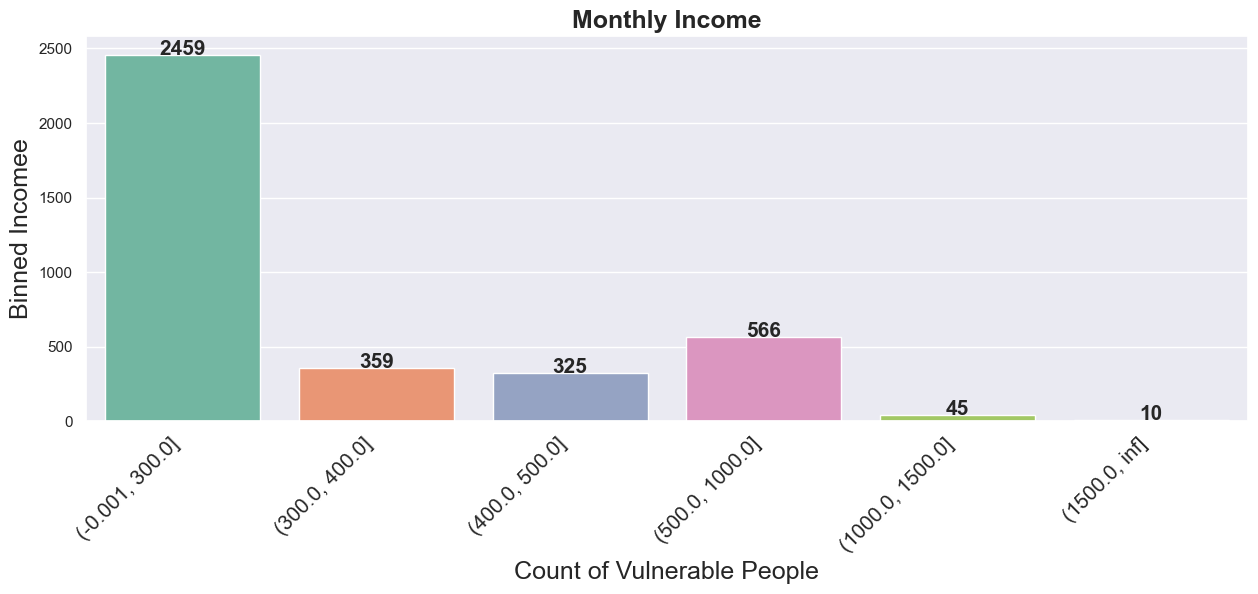

In [282]:
ax=sns.countplot(x="income_bin",data=df,palette="Set2");
ax.set_title("Monthly Income", fontsize=18,fontweight="bold")
ax.set_xlabel("Count of Vulnerable People", fontsize=18)
ax.set_ylabel("Binned Incomee", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",fontsize=15)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=15,fontweight="bold")
    
sns.set(rc={"figure.figsize":(15,5)})
plt.show();

### Covid Damage Status

In [284]:
df["covid_damage_status"]=df["covid_damage_status"].replace('Bəli','Yes')
df["covid_damage_status"]=df["covid_damage_status"].replace('Xeyr','No')
df['covid_damage_status']=df['covid_damage_status'].replace(np.nan,'Null data')
df["covid_damage_status"].isnull().sum()

0

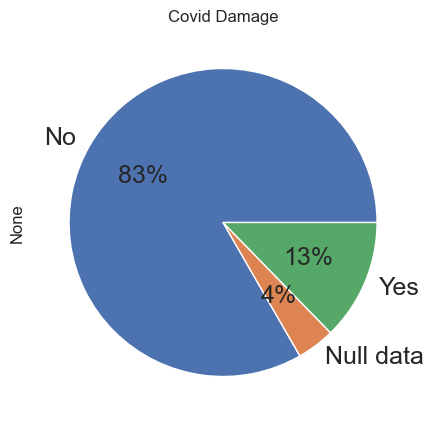

In [285]:
df.groupby("covid_damage_status").size().plot(kind="pie",autopct="%1.0f%%",title="Covid Damage",fontsize=18)
plt.show();

### Covid Impact

In [199]:
df["covid_impact"].unique()

array(['Şiddətli təsir etdi', 'Az təsir etdi', nan,
       'Kifayət qədər təsir etdi', 'Təsir etmədi'], dtype=object)

In [200]:
df["covid_impact"]=df["covid_impact"].replace(np.nan,"Null data")

In [286]:
def englishconverter(k):
    if k=='Şiddətli təsir etdi':
        return 'Severe Impact'
    elif k=='Az təsir etdi':
        return 'Less Impact'
    elif k=='Kifayət qədər təsir etdi':
        return 'Enough Impact'
    elif k=='Təsir etmədi':
        return 'No Impact'
    else:
        return 'NA'

df['covid_impact']=df['covid_impact'].apply(lambda x: englishconverter(x))

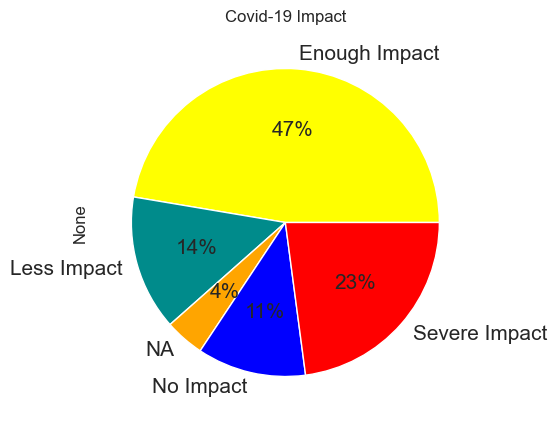

In [287]:
df.groupby("covid_impact").size().plot(kind="pie",autopct="%1.0f%%",title="Covid-19 Impact",fontsize=15,colors=["yellow","darkcyan","orange","blue","red"])
plt.show();

### Depression, Stress, None

In [347]:
df.head(5)

,survey_status,birthday,gender,marital_status,work_status,family_size,war_impact,beneficiary_income,family_income,foreign_income,disability_degree,debt_status,debt_2others,debt_2bank,debt_forrepairhome,assistance_status,assistance_source,vulnerable_needs,food_needs,agriculture_needs,construction_needs,medical_needs,other2_needs,monthly_income,covid_damage_status,covid_impact,depression,stress,none
0,Bəli,1965-02-22,Kişi,Evli,İşləmirəm,3.0,Şiddətli təsir etdi,Tam işdən gələn gəlir,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,Başqasından alınmış borc,NaN,NaN,Xeyr,Almayıb,NaN,NaN,NaN,NaN,Aid olanları seçin,Nağd yardımı,0 AZN,Bəli,Şiddətli təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN
1,Bəli,1970-11-20,Kişi,Evli,İşləmirəm,4.0,Şiddətli təsir etdi,NaN,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,NaN,NaN,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,NaN,0 AZN,Xeyr,Kifayət qədər təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN
2,Bəli,1982-02-28,Kişi,Evli,İşləyirəm,5.0,Az təsir etdi,Tam işdən gələn gəlir,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Xeyr,NaN,NaN,Ödənməmiş bank krediti,NaN,Bəli,İşlədiyi hərbi hissədən,NaN,NaN,NaN,Aid olanları seçin,NaN,NaN,700 AZN,Xeyr,Az təsir etdi,NaN,NaN,Aid olanları seçin:
3,Bəli,1962-10-02,Kişi,Evli,İşləmirəm,8.0,Şiddətli təsir etdi,NaN,Ailə üzvlərinin sosial müavinətləri/təqaüdlər,NaN,Bəli,Bəli,NaN,Ödənməmiş bank krediti,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,"Ev lazımdır, evləri pis gündədir",0 AZN,Xeyr,Şiddətli təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN
4,Bəli,1976-10-07,Kişi,Evli,İşləmirəm,4.0,Şiddətli təsir etdi,NaN,NaN,NaN,Bəli,Xeyr,NaN,NaN,NaN,Xeyr,Almayıb,Aid olanları seçin,Aid olanları seçin,NaN,NaN,Aid olanları seçin,NaN,0 AZN,Xeyr,Kifayət qədər təsir etdi,Aid olanları seçin:,Aid olanları seçin:,NaN


In [348]:
df['depression']=df['depression'].replace(np.nan,'Null data')
df['depression']=df['depression'].apply(lambda x:x.lower())

In [349]:
k=["aid olanları seçin:"]

df.loc[(df.depression.str.contains('|'.join(k))),"depression"]="depression"

print(len(list(df['depression'].apply(lambda x:x.lower()).unique())))
sorted(list(df['depression'].apply(lambda x:x.lower()).unique()))

2


['depression', 'null data']

In [350]:
df['stress']=df['stress'].replace(np.nan,'Null data')
df['stress']=df['stress'].apply(lambda x:x.lower())

In [351]:
l=["aid olanları seçin:"]

df.loc[(df.stress.str.contains('|'.join(l))),"stress"]="stress"

print(len(list(df['stress'].apply(lambda x:x.lower()).unique())))
sorted(list(df['stress'].apply(lambda x:x.lower()).unique()))

2


['null data', 'stress']

In [352]:
df['none']=df['none'].replace(np.nan,'Null data')
df['none']=df['none'].apply(lambda x:x.lower())

In [353]:
m=["aid olanları seçin:"]

df.loc[(df.none.str.contains('|'.join(m))),"none"]="none"

print(len(list(df['none'].apply(lambda x:x.lower()).unique())))
sorted(list(df['none'].apply(lambda x:x.lower()).unique()))

2


['none', 'null data']

In [354]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df5=pd.DataFrame(df,columns=["depression","stress","none"])
df5.head(10)

,depression,stress,none
0,depression,stress,null data
1,depression,stress,null data
2,null data,null data,none
3,depression,stress,null data
4,depression,stress,null data
5,null data,null data,null data
6,depression,stress,null data
7,depression,stress,null data
8,depression,stress,null data
9,depression,stress,null data


In [355]:
df5["depression"]=df5["depression"].map({"depression":1,"null data":0})
df5["stress"]=df5["stress"].map({"stress":1,"null data":0})
df5["none"]=df5["none"].map({"none":1,"null data":0})

df5.head()

,depression,stress,none
0,1,1,0
1,1,1,0
2,0,0,1
3,1,1,0
4,1,1,0


In [356]:
df6=["depression&stress"]

In [357]:
for col in df6:
    df5[col]=0
    
df5.loc[((df5.depression==1)&(df5.stress==1)),df6[0]]=1
df5.head()

,depression,stress,none,depression&stress
0,1,1,0,1
1,1,1,0,1
2,0,0,1,0
3,1,1,0,1
4,1,1,0,1


In [358]:
melted_df5=pd.melt(df5[["depression","stress","none","depression&stress"]])
melted_df5.head()

,variable,value
0,depression,1
1,depression,1
2,depression,0
3,depression,1
4,depression,1


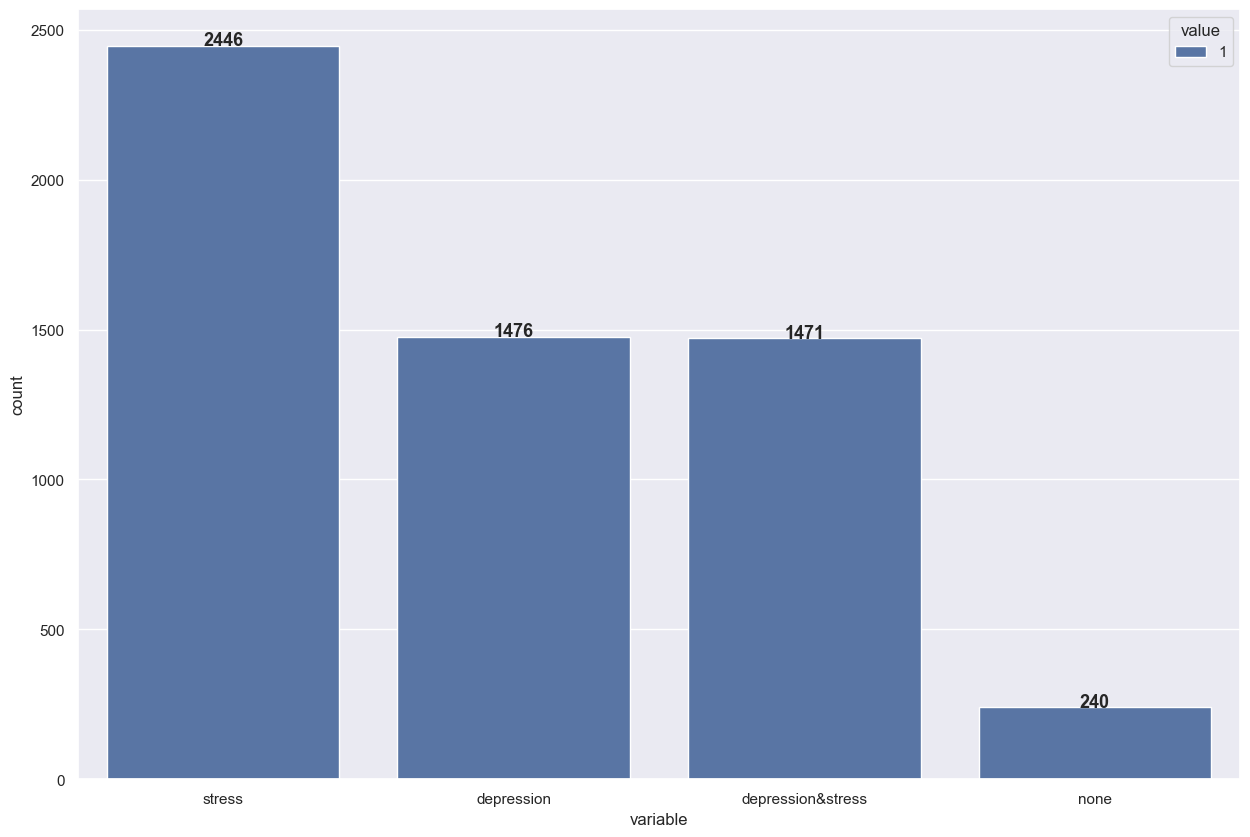

In [359]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=melted_df5[melted_df5.value==1],x="variable",hue="value",order=melted_df5[melted_df5.value==1].variable.value_counts().index);
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+0.75,rect.get_height(),horizontalalignment="center",fontsize=13,fontweight="bold")
    
plt.show();